In [ ]:
pip install emd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 954.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
pip install scaleogram

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from statsmodels. tsa.stattools import adfuller
import scipy
import emd
from statsmodels.tsa.stattools import acf
from scipy.stats import pearsonr
import pywt
from scipy import signal
from scipy.integrate import quad
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pylab import*
import scaleogram as scg
from scipy import fftpack

df = pd.read_csv('/content/Dow Jones.csv')

In [ ]:
from statsmodels.tsa.stattools import acf
from scipy.signal import lfilter
df.head()

Date      Price       Open     High        Low     Vol. Change %
0 2019-12-31  28,538.44  28,414.64  28547.0  28,376.49  193.34M    0.27%
1 2019-12-30  28,462.14  28,654.76  28665.0  28,428.98  185.07M   -0.64%
2 2019-12-27  28,645.26  28,675.34  28702.0  28,608.98  184.93M    0.08%
3 2019-12-26  28,621.39  28,539.46  28624.0  28,535.15  155.97M    0.37%
4 2019-12-24  28,515.45  28,572.57  28577.0  28,503.21   95.29M   -0.13%

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

In [ ]:
df['High'] = df['High'].str.replace(',', '').astype(float)

In [ ]:
df['High'] = df['High'].round()

In [ ]:
df.head()

Date      Price       Open     High        Low     Vol. Change %
0 2019-12-31  28,538.44  28,414.64  28547.0  28,376.49  193.34M    0.27%
1 2019-12-30  28,462.14  28,654.76  28665.0  28,428.98  185.07M   -0.64%
2 2019-12-27  28,645.26  28,675.34  28702.0  28,608.98  184.93M    0.08%
3 2019-12-26  28,621.39  28,539.46  28624.0  28,535.15  155.97M    0.37%
4 2019-12-24  28,515.45  28,572.57  28577.0  28,503.21   95.29M   -0.13%

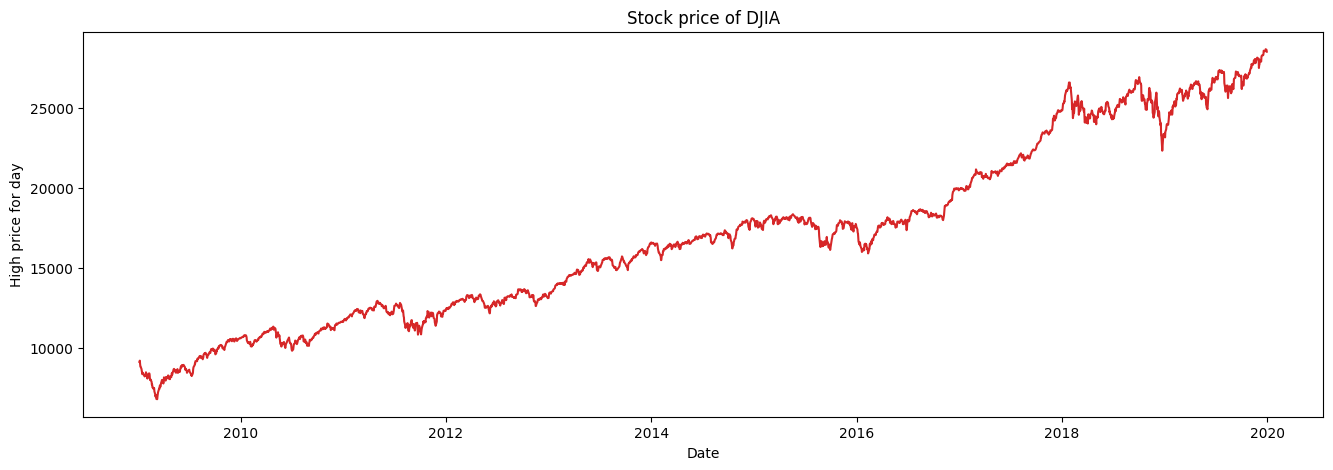

In [ ]:
def plot_df(dataset, x, y, title="", xlabel='Date',
            ylabel='High price for day', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.Date, y=df.High, title='Stock price of DJIA')

In [ ]:
# Определяем функцию для теста ADF
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','Число лагов','Число наблюднений'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df.High)

Results of Dickey-Fuller Test:
Test Statistic            -1.481366
p-value                    0.542708
Число лагов               14.000000
Число наблюднений       2751.000000
Critical Value (1%)       -3.432729
Critical Value (5%)       -2.862591
Critical Value (10%)      -2.567330
dtype: float64


/usr/local/lib/python3.10/dist-packages/emd/support.py:228: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]


<Axes: xlabel='Time (samples)'>

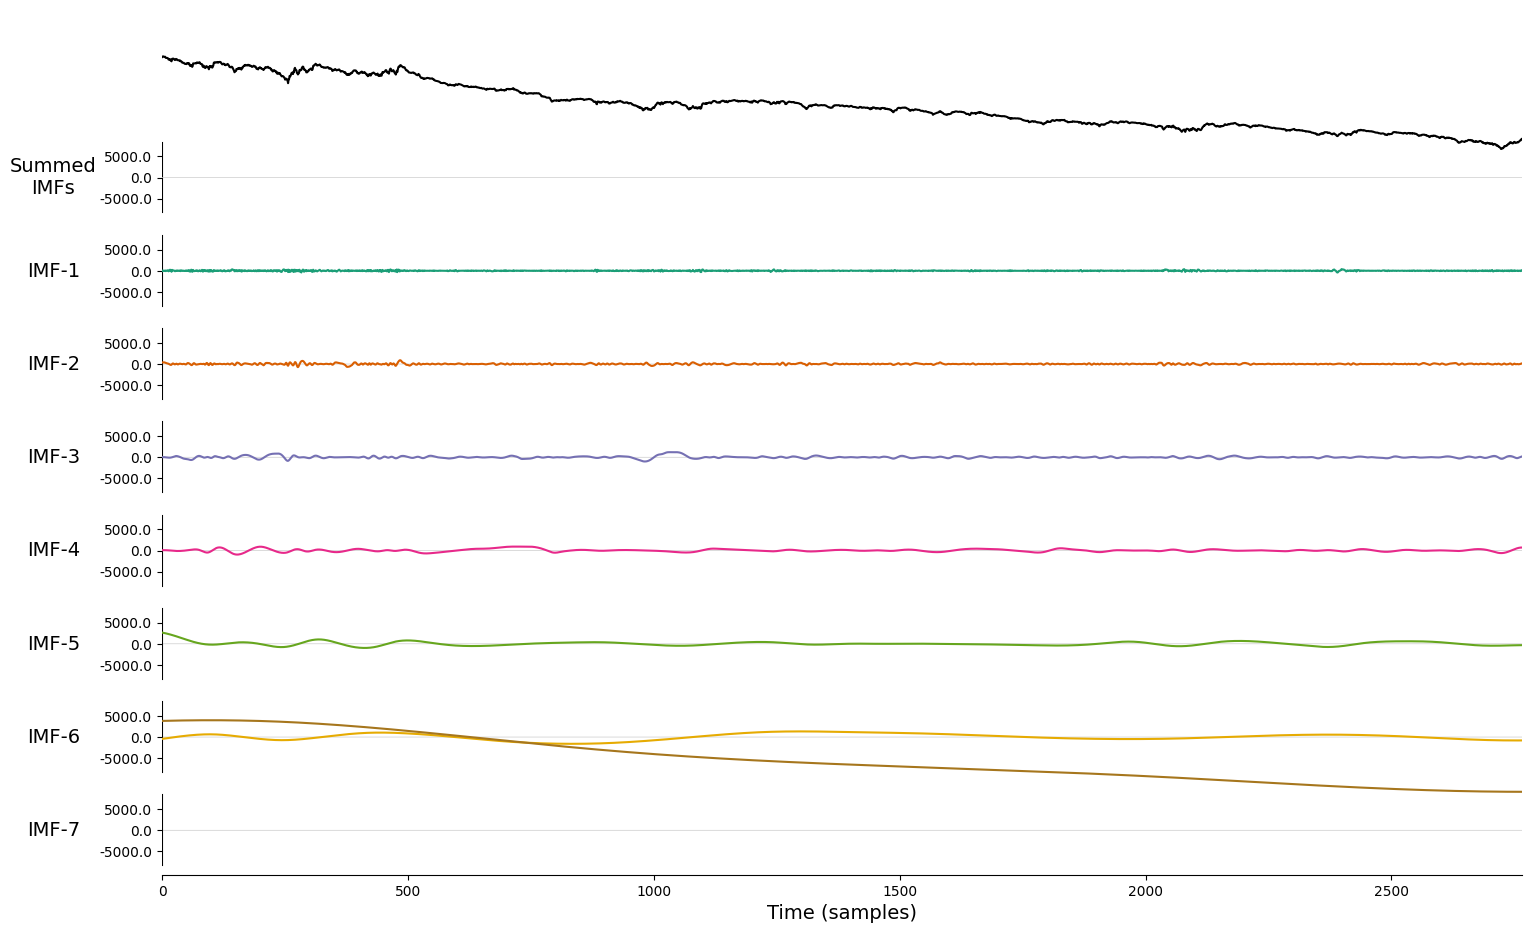

In [ ]:
imf=emd.sift.sift(df.High, max_imfs=9)
emd.plotting.plot_imfs(imf)

In [ ]:
IMF3 = [item[3] for item in imf]
IMF5 = [item[5] for item in imf]
IMF1 = [item[1] for item in imf]
imf2 = [item[2] for item in imf]
IMF4 = [item[4] for item in imf]
IMF6 = [item[6] for item in imf]

In [ ]:
New_time_series = df.High - IMF6 - IMF5

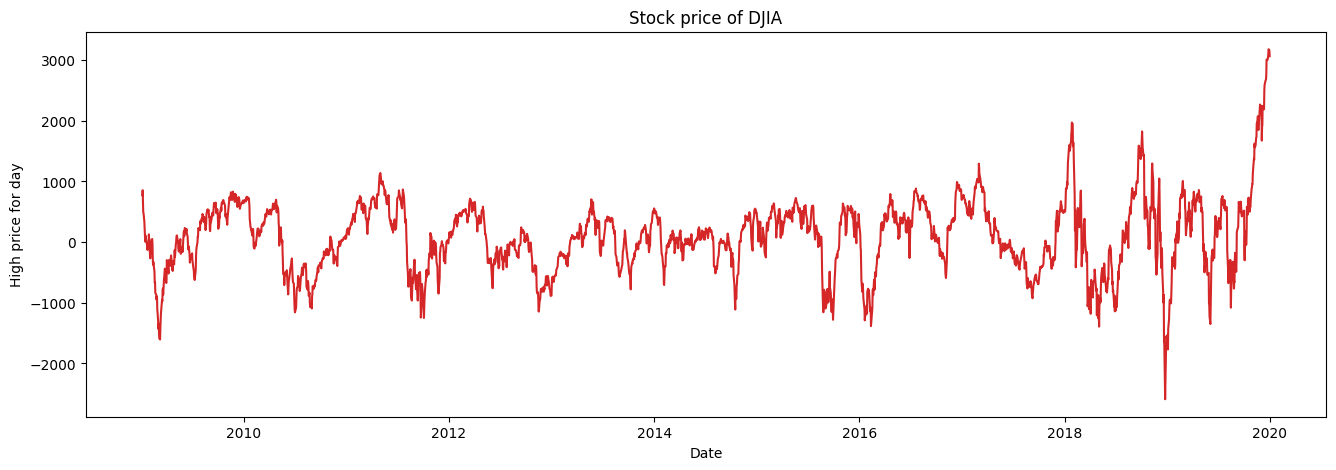

In [ ]:
plot_df(New_time_series , x=df.Date, y=New_time_series , title='Stock price of DJIA')

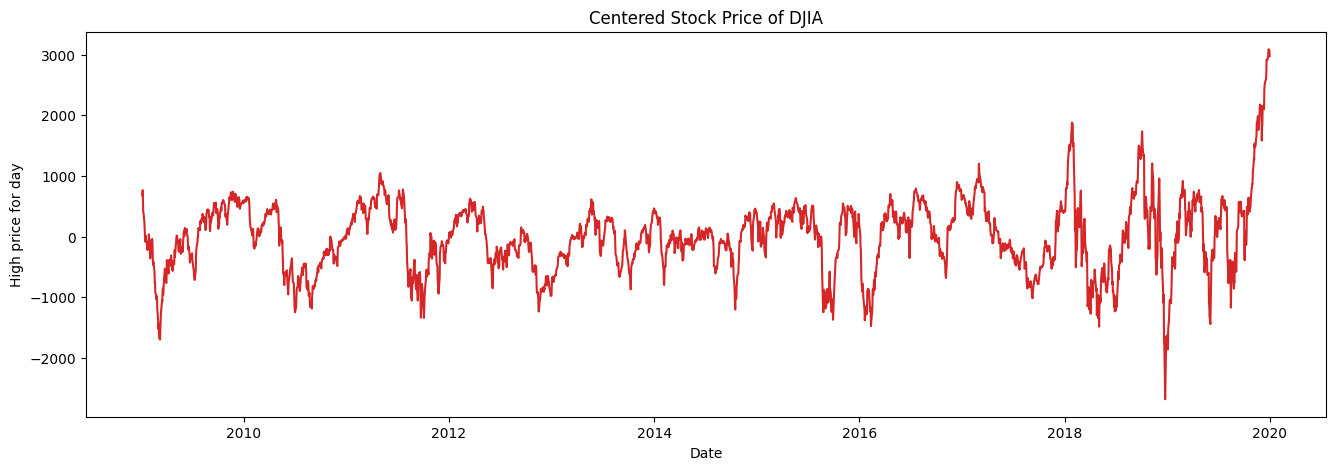

Results of Dickey-Fuller Test:
Test Statistic         -7.282553e+00
p-value                 1.487300e-10
Число лагов             2.200000e+01
Число наблюднений       2.743000e+03
Critical Value (1%)    -3.432736e+00
Critical Value (5%)    -2.862594e+00
Critical Value (10%)   -2.567331e+00
dtype: float64


In [ ]:
# Центрируем временной ряд и визуализируем
mean_value = New_time_series.mean()
centered_time_series = New_time_series - mean_value
plot_df(centered_time_series, x=df.Date, y=centered_time_series, title='Centered Stock Price of DJIA')
test_stationarity(centered_time_series)

In [ ]:
x = df['Date']
y = centered_time_series

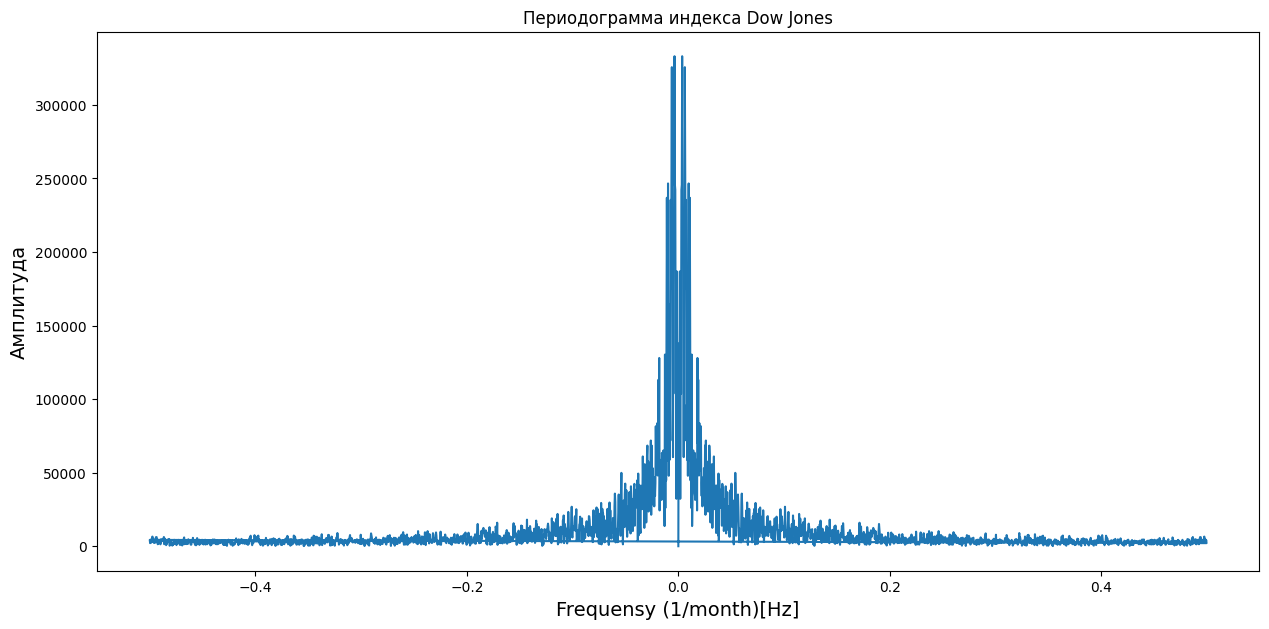

In [ ]:
y_rift = abs(scipy.fft.fft(y.values))
freq = scipy.fft.fftfreq(len(y))
plt.figure(figsize = (15, 7))
plt.plot(freq, y_rift)
plt.title('Периодограмма индекса Dow Jones')
plt.xlabel('Frequensy (1/month)[Hz]', fontsize = 14)
plt.ylabel('Амплитуда', fontsize = 14)
plt.show()

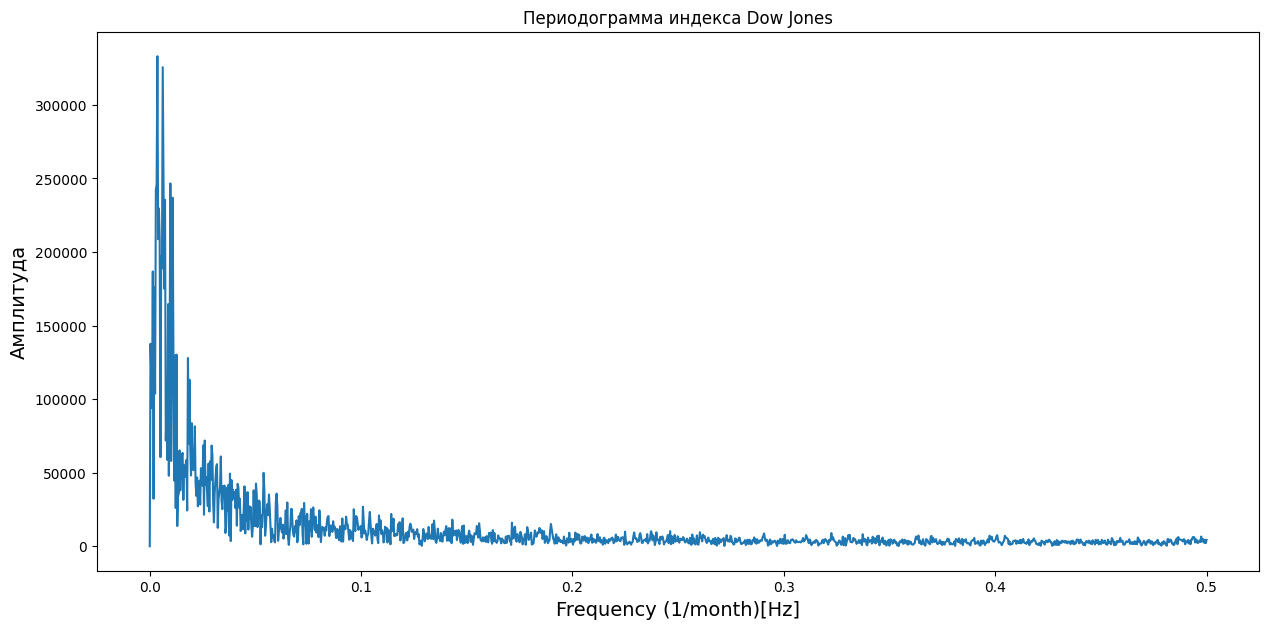

In [ ]:
y_rift = abs(scipy.fft.rfft(y.values))
freq = scipy.fft.rfftfreq(len(y))
plt.figure(figsize = (15, 7))
plt.plot(freq, y_rift)
plt.title('Периодограмма индекса Dow Jones')
plt.xlabel('Frequency (1/month)[Hz]', fontsize = 14)
plt.ylabel('Амплитуда', fontsize = 14)
plt.show()

In [ ]:
# Порог как процент от максимума
threshold_percentage = 0.05
# Найдем максимальную амплитуду
max_amplitude = np.max(y_rift)
# Установим порог
threshold = threshold_percentage * max_amplitude
# Создадим новую периодограмму с отфильтрованными амплитудами
filtered_y_rift = np.where(y_rift > threshold, y_rift, 0)
# Выполним обратное преобразование Фурье
filtered_y = scipy.fft.irfft(filtered_y_rift, n=len(y))

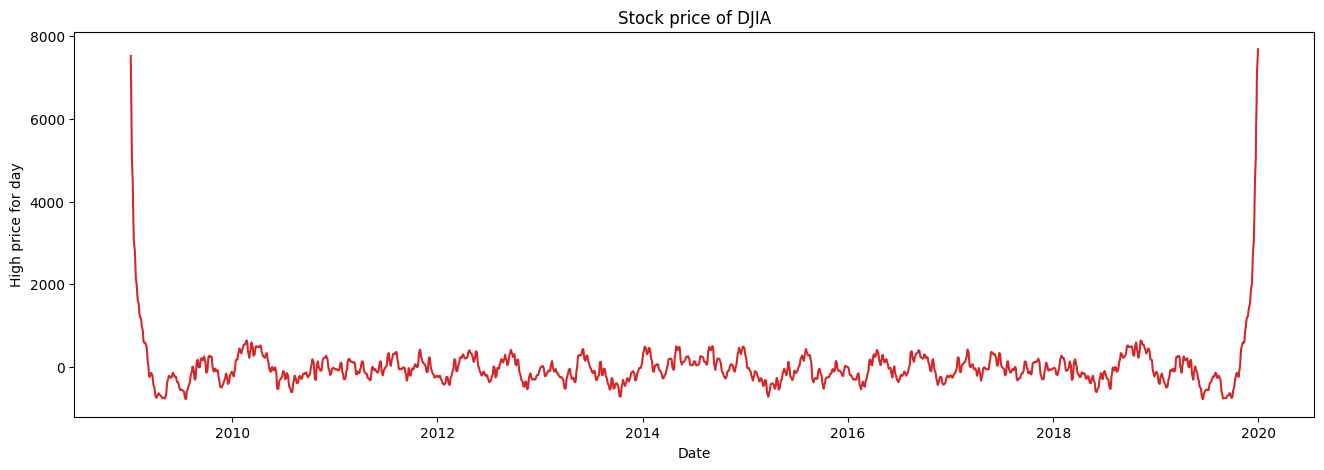

In [ ]:
# Визуализируем восстановленный ряд
plot_df(df, x=df.Date, y=filtered_y, title='Stock price of DJIA')

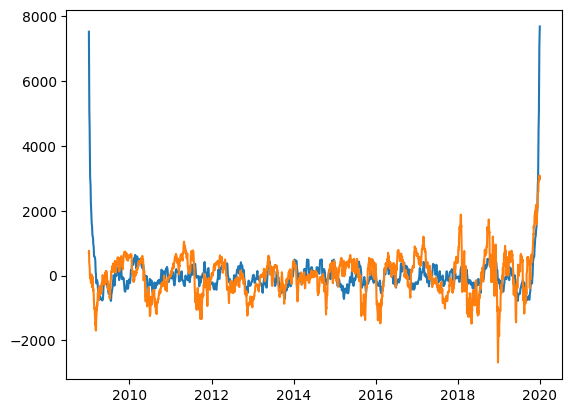

In [ ]:
plt.plot(df.Date, filtered_y)
plt.plot(df.Date, centered_time_series)

In [ ]:
filtered_y = filtered_y[:len(y)]

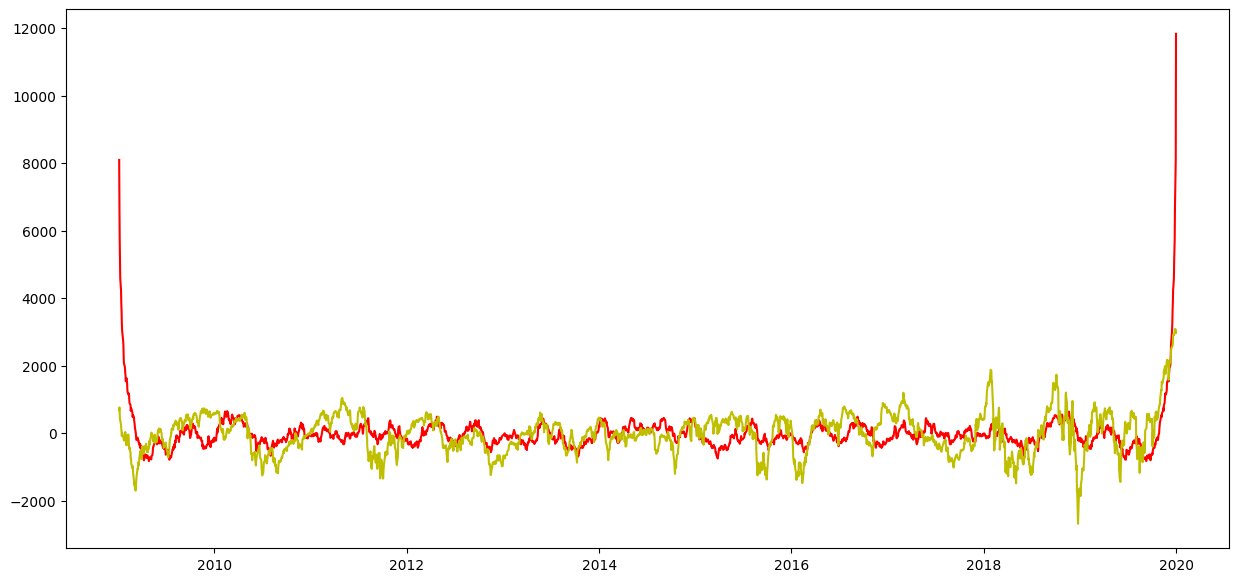

Корреляция между изначальным рядом и остатком: 0.5557139874913409


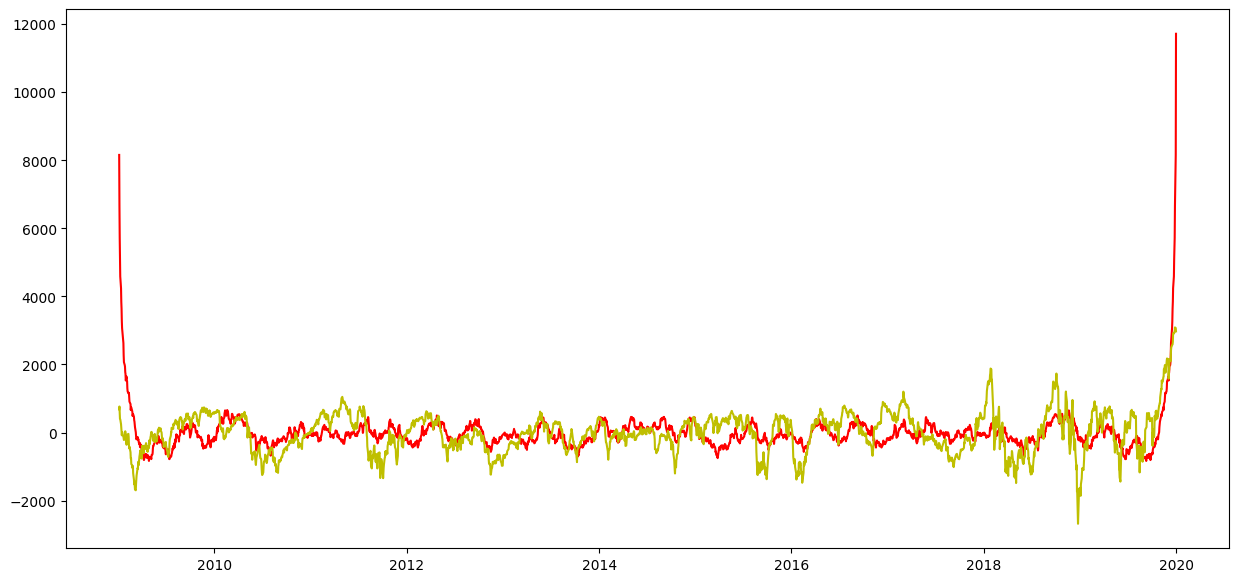

Корреляция между изначальным рядом и остатком: 0.5557514770737707


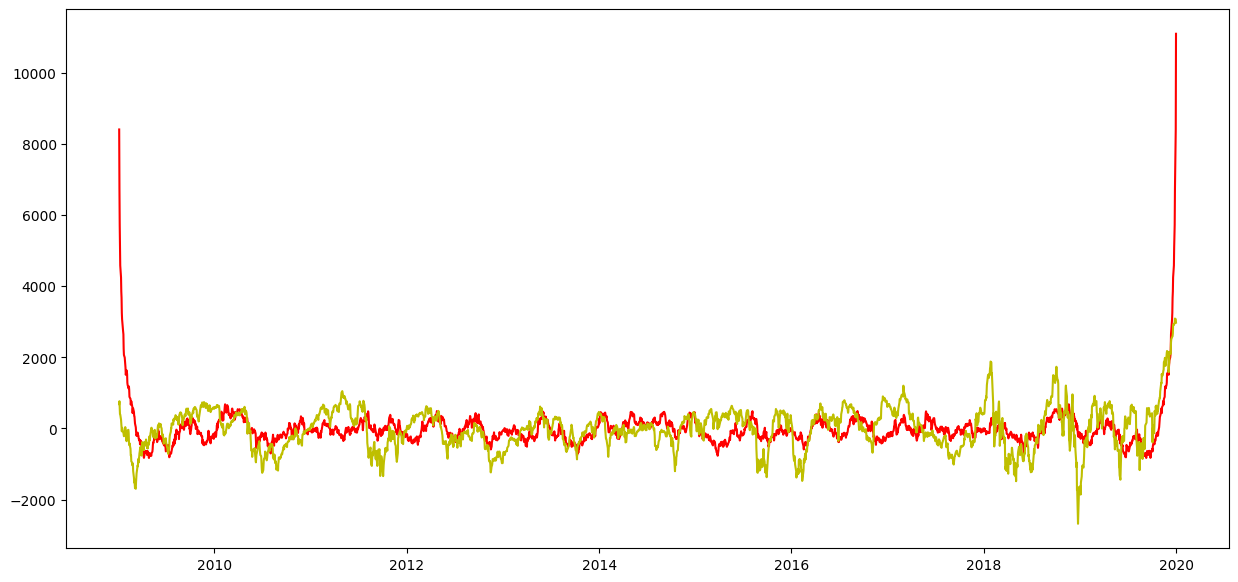

Корреляция между изначальным рядом и остатком: 0.5562836260659504


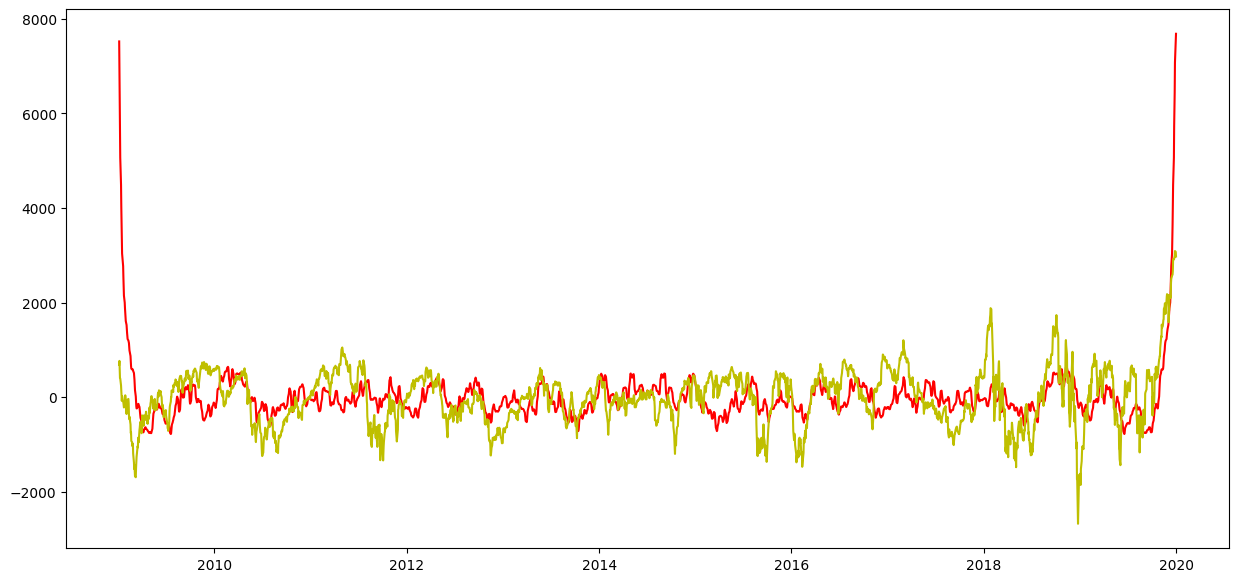

Корреляция между изначальным рядом и остатком: 0.5649915394909357


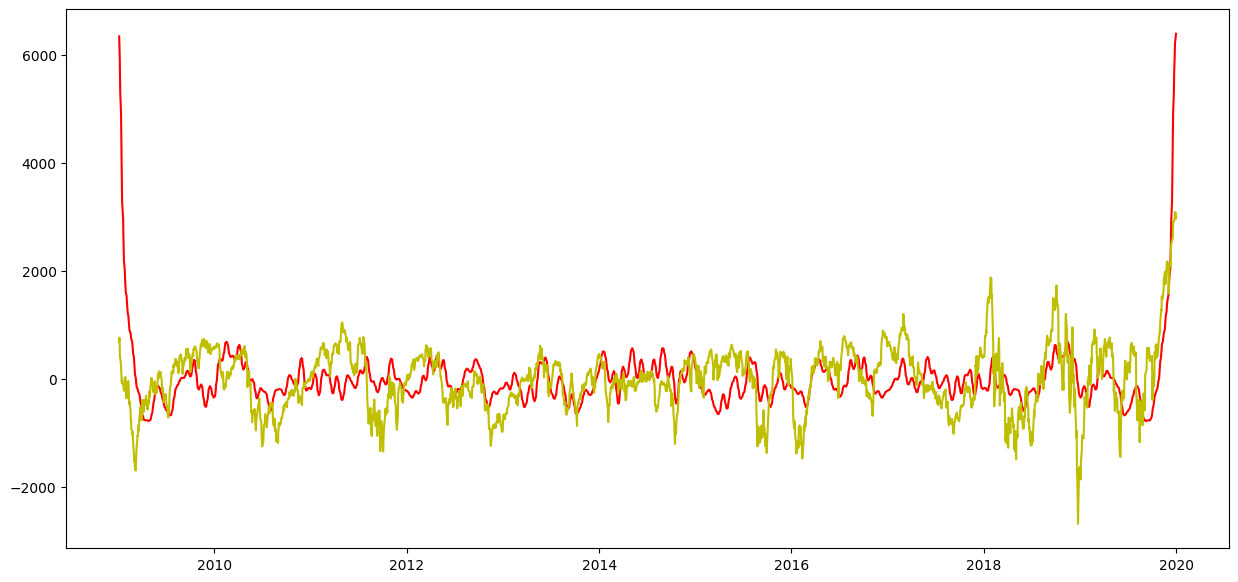

Корреляция между изначальным рядом и остатком: 0.5740589931440573


In [ ]:
threshold_lst = [0.001, 0.005, 0.01, 0.05, 0.1]
for index, threshold in enumerate(threshold_lst):
  current_threshold = threshold * max_amplitude
  filtered_y_rift = np.where(y_rift > current_threshold, y_rift, 0)
  filtered_y = scipy.fft.irfft(filtered_y_rift, n=len(y))
  plt.figure(figsize=(15, 7))
  plt.plot(df.Date, filtered_y, "r", label = "Filtered")
  plt.plot(df.Date, centered_time_series, "y", label = "Original")
  #plt.plot(residual, "b", label = "Residual")
  plt.show()
  # Вычислим разницу между изначальным и сглаженным рядом (остаток)
  residual = centered_time_series - filtered_y
  # Вычислим корреляцию между изначальным рядом и остатком
  correlation = np.corrcoef(centered_time_series, residual)[0, 1]
  print("Корреляция между изначальным рядом и остатком:", correlation)

#Не получается отфильтровать временной ряд на разумном уровне, чтобы остатки не коррелировали с изачальным временным рядом.

#Вейвлет анализ

In [ ]:
wavelet = 'db4'
level = 6
coeffs = pywt.wavedec(centered_time_series, wavelet, level=level)
approximation = coeffs[0]
details = coeffs[1:]

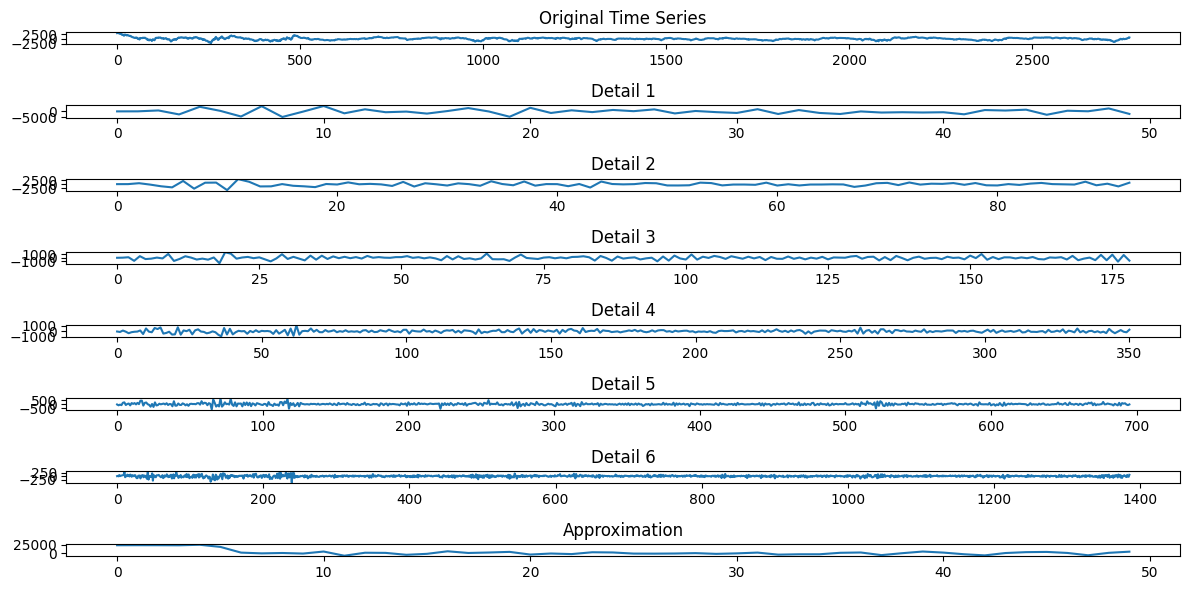

In [ ]:
# Визуализация временного ряда и его разложенных компонент
plt.figure(figsize=(12, 6))
plt.subplot(level + 2, 1, 1)
plt.plot(centered_time_series)
plt.title("Original Time Series")

for i, detail in enumerate(details):
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(detail)
    plt.title(f"Detail {i + 1}")

plt.subplot(level + 2, 1, level + 2)
plt.plot(approximation)
plt.title("Approximation")

plt.tight_layout()
plt.show()

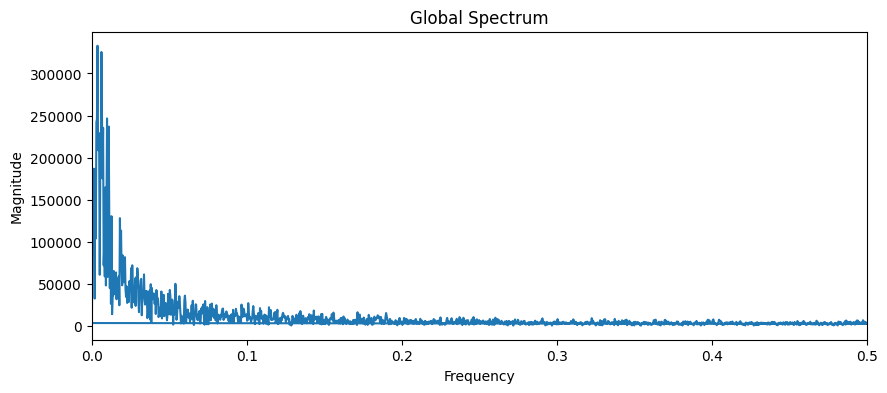

In [ ]:
# Визуализация глобального спектра
global_spectrum = np.abs(np.fft.fft(centered_time_series))
frequencies = np.fft.fftfreq(len(centered_time_series))
plt.figure(figsize=(10, 4))
plt.plot(frequencies, global_spectrum)
plt.title("Global Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.xlim(0, 0.5)
plt.show()

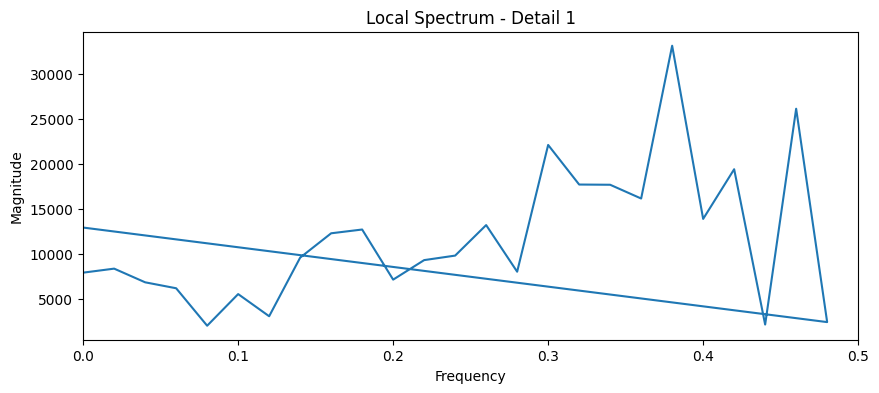

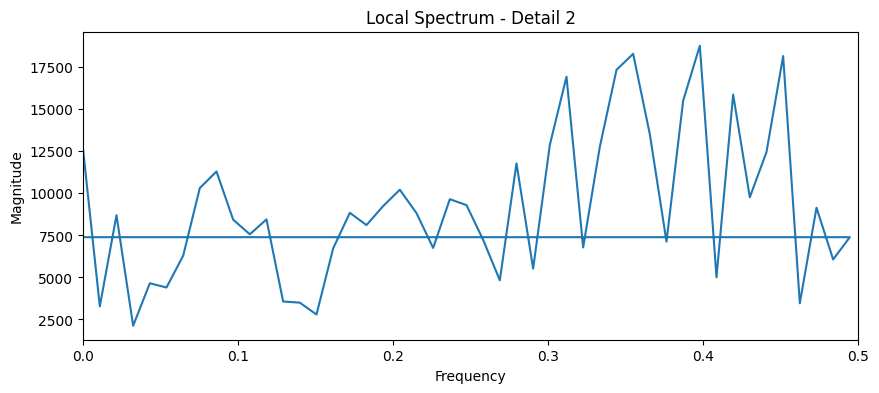

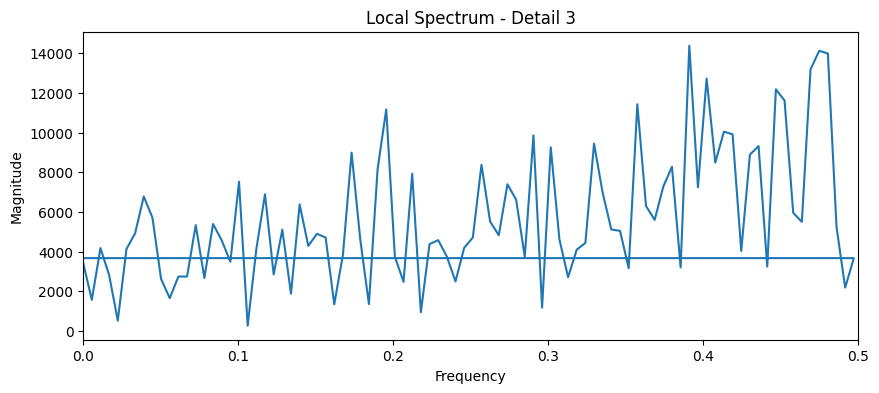

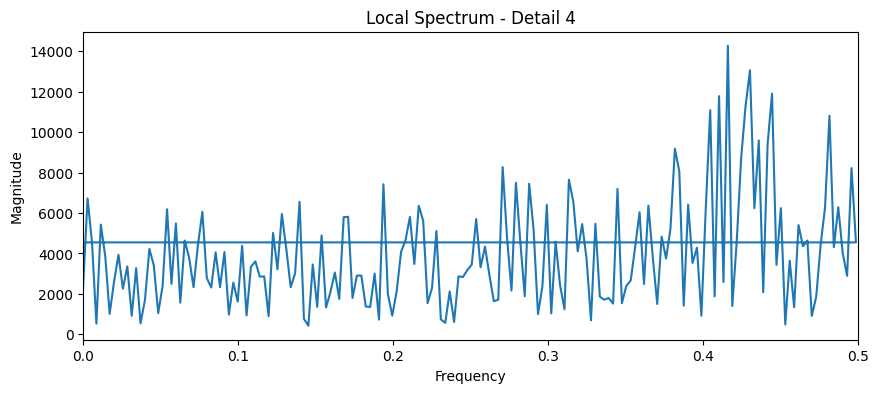

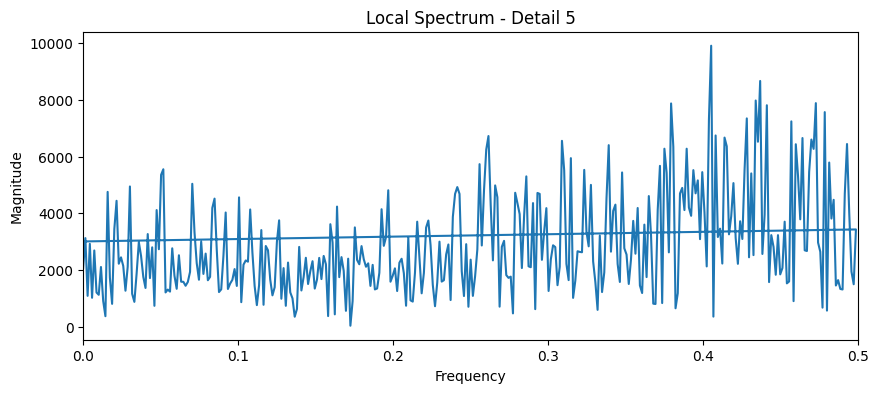

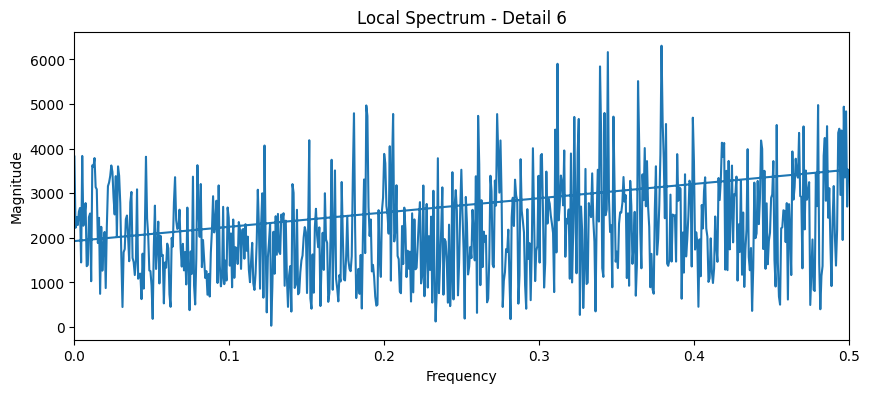

In [ ]:
# Визуализация локальных спектров
for i, detail in enumerate(details):
    local_spectrum = np.abs(np.fft.fft(detail))
    frequencies_detail = np.fft.fftfreq(len(detail))
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies_detail, local_spectrum)
    plt.title(f"Local Spectrum - Detail {i + 1}")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.xlim(0, 0.5)
    plt.show()

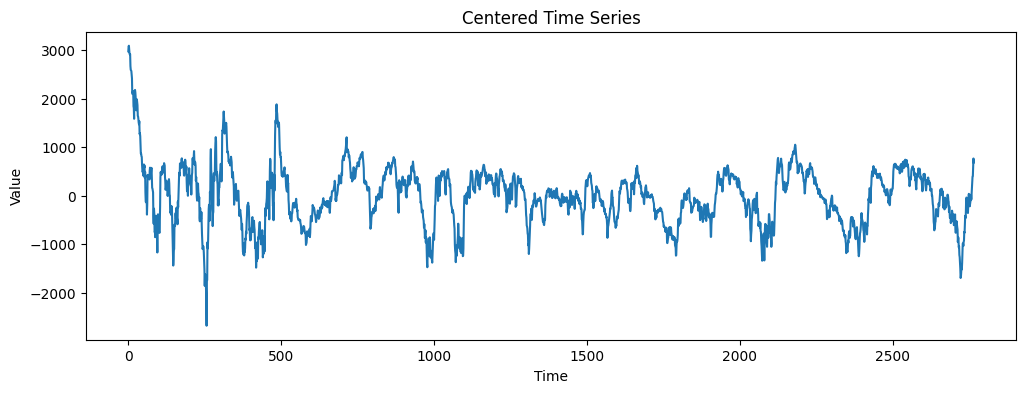

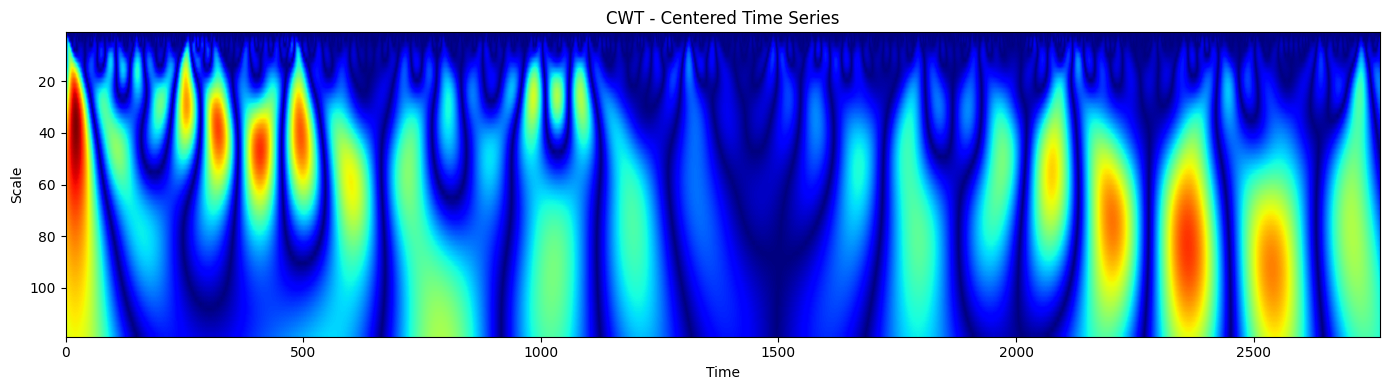

In [ ]:
wavelet = signal.ricker
scales = np.arange(1, 120, 2)
plt.figure(figsize=(12, 4))
plt.plot(centered_time_series)
plt.title("Centered Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
# Вейвлет-преобразование
cwt_centered = signal.cwt(centered_time_series, wavelet, scales)

# Визуализация скалограммы
plt.figure(figsize=(14, 4))
plt.imshow(np.abs(cwt_centered), extent=[0, len(centered_time_series), scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title("CWT - Centered Time Series")
plt.xlabel("Time")
plt.ylabel("Scale")

plt.tight_layout()
plt.show()

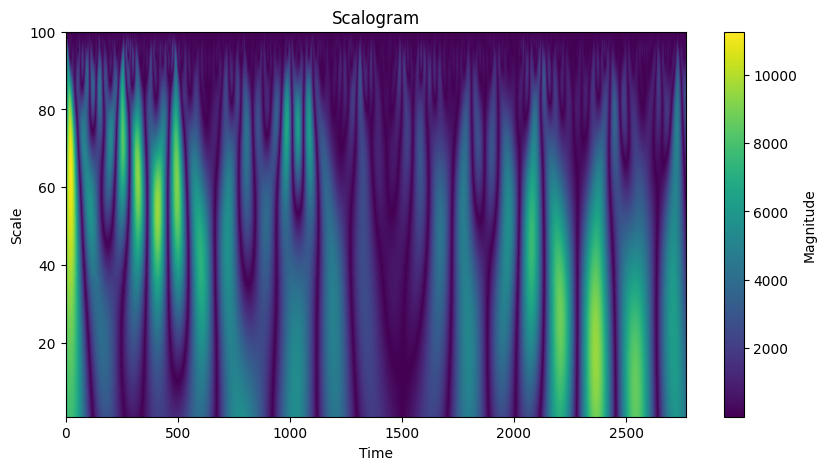

In [ ]:
wavelet = 'mexh'

scales = np.arange(1, 101)
coef, freqs = pywt.cwt(centered_time_series, scales, wavelet)

# Визуализация скейлограммы
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(coef), extent=[0, len(centered_time_series), 1, 100], cmap='viridis', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Scalogram')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()

#Детрендирование с помощью вычитания полинома

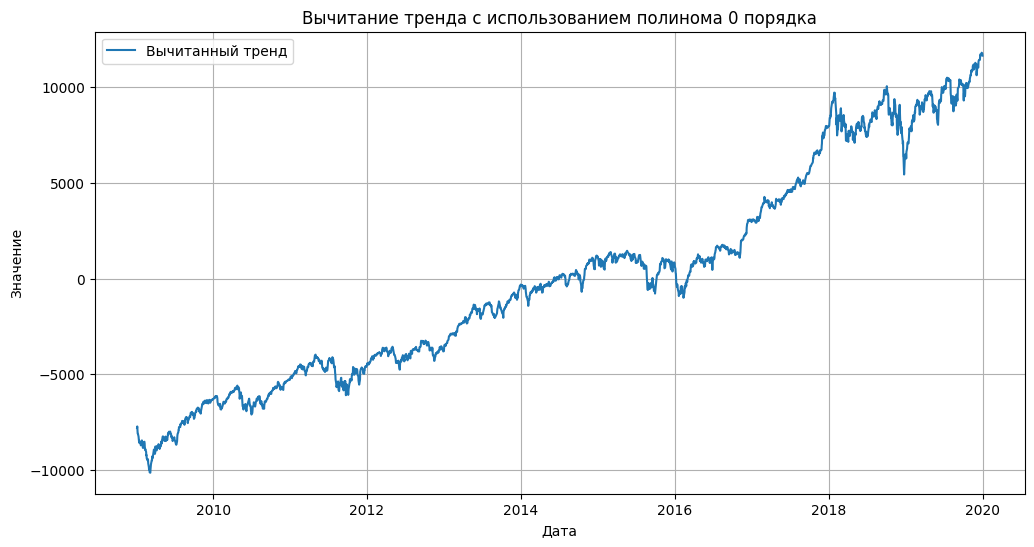

Results of Dickey-Fuller Test:
Test Statistic            -1.481366
p-value                    0.542708
Число лагов               14.000000
Число наблюднений       2751.000000
Critical Value (1%)       -3.432729
Critical Value (5%)       -2.862591
Critical Value (10%)      -2.567330
dtype: float64


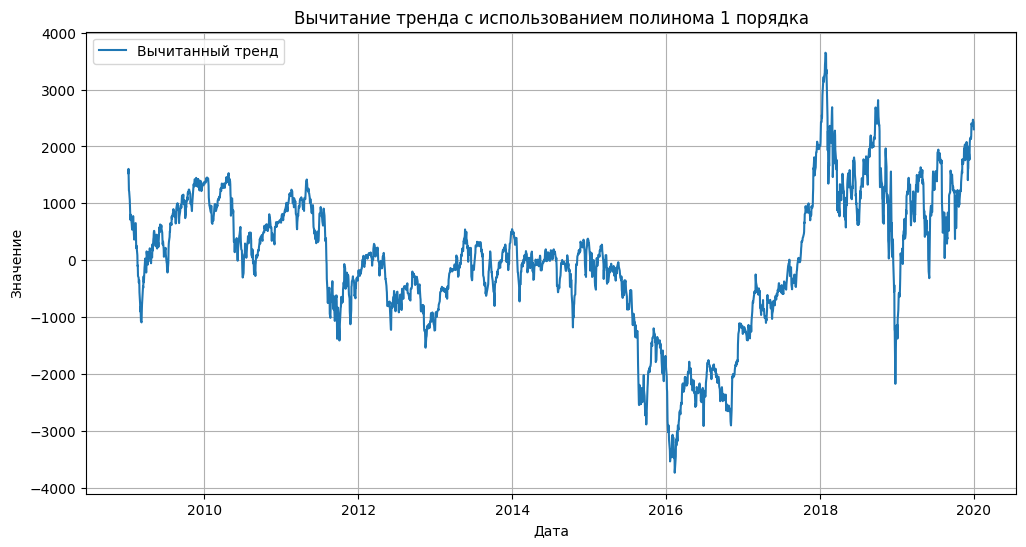

Results of Dickey-Fuller Test:
Test Statistic            -2.843084
p-value                    0.052378
Число лагов               14.000000
Число наблюднений       2751.000000
Critical Value (1%)       -3.432729
Critical Value (5%)       -2.862591
Critical Value (10%)      -2.567330
dtype: float64


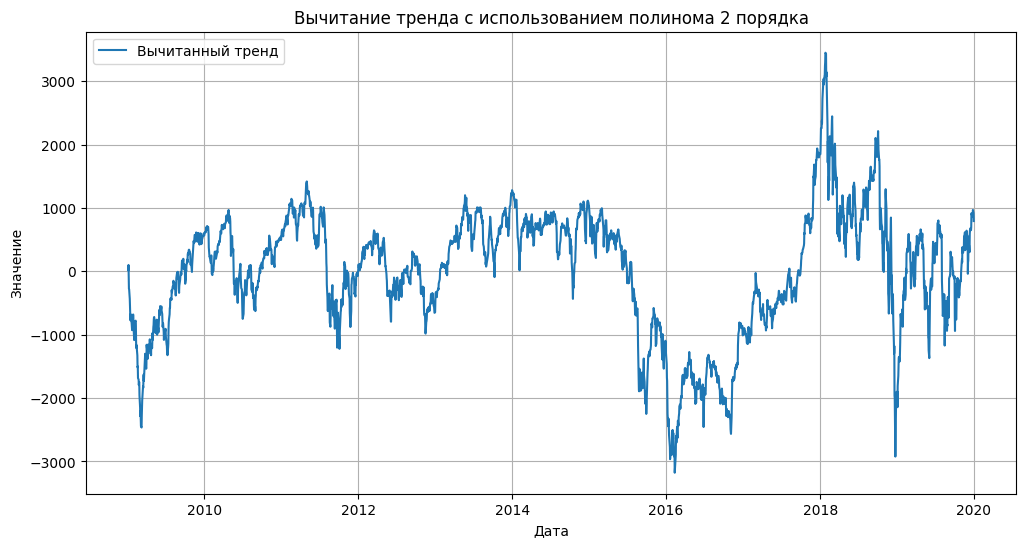

Results of Dickey-Fuller Test:
Test Statistic            -3.376045
p-value                    0.011803
Число лагов               14.000000
Число наблюднений       2751.000000
Critical Value (1%)       -3.432729
Critical Value (5%)       -2.862591
Critical Value (10%)      -2.567330
dtype: float64


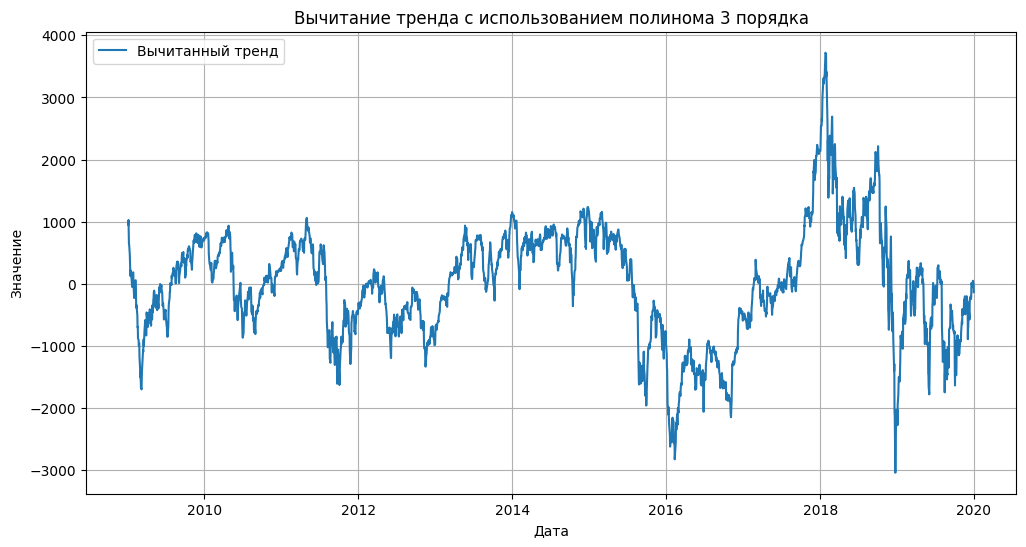

Results of Dickey-Fuller Test:
Test Statistic            -3.582849
p-value                    0.006098
Число лагов               14.000000
Число наблюднений       2751.000000
Critical Value (1%)       -3.432729
Critical Value (5%)       -2.862591
Critical Value (10%)      -2.567330
dtype: float64


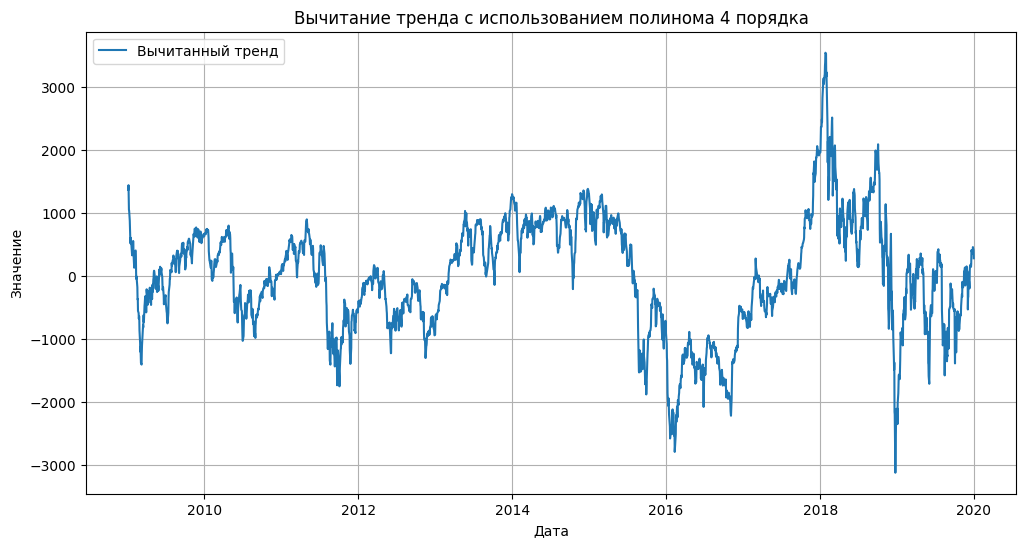

Results of Dickey-Fuller Test:
Test Statistic            -3.535228
p-value                    0.007127
Число лагов               14.000000
Число наблюднений       2751.000000
Critical Value (1%)       -3.432729
Critical Value (5%)       -2.862591
Critical Value (10%)      -2.567330
dtype: float64


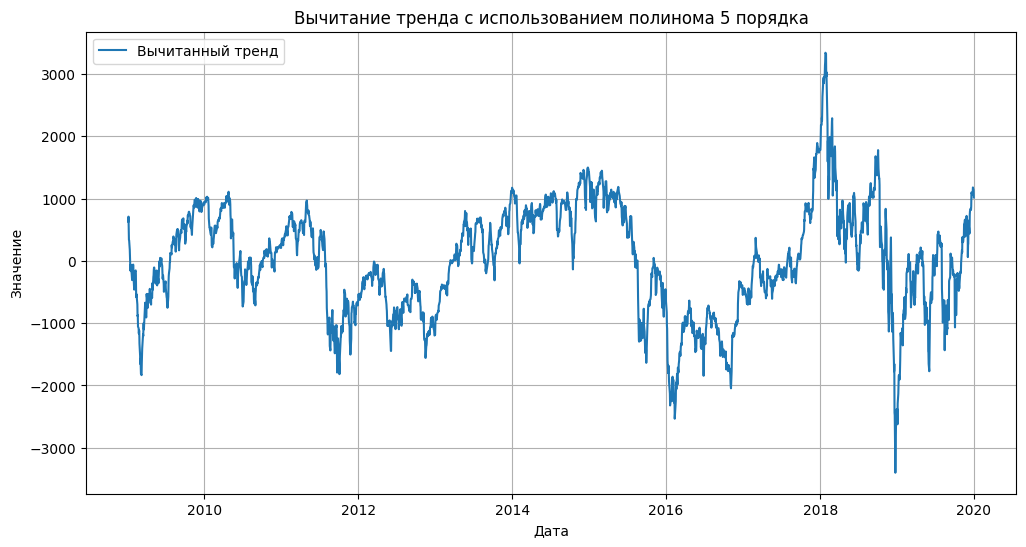

Results of Dickey-Fuller Test:
Test Statistic            -3.810357
p-value                    0.002803
Число лагов               14.000000
Число наблюднений       2751.000000
Critical Value (1%)       -3.432729
Critical Value (5%)       -2.862591
Critical Value (10%)      -2.567330
dtype: float64


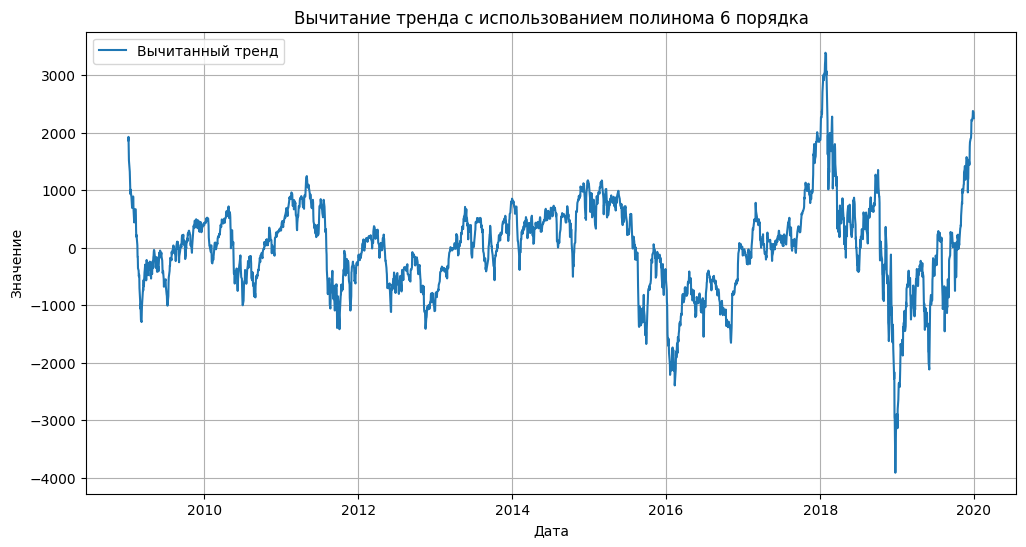

Results of Dickey-Fuller Test:
Test Statistic            -4.426200
p-value                    0.000267
Число лагов               23.000000
Число наблюднений       2742.000000
Critical Value (1%)       -3.432737
Critical Value (5%)       -2.862595
Critical Value (10%)      -2.567331
dtype: float64


In [ ]:
x = np.arange(len(df))
for i in range(7):
  coeffs = np.polyfit(x, df['High'], i)
  polynomial = np.poly1d(coeffs)

  # Вычисляем тренд, вычитая полином
  trend = polynomial(x)
  detrended_series = df['High'] - trend
  plt.figure(figsize=(12, 6))
  #plt.plot(df['Date'], df['High'], label='Исходный временной ряд')
  #plt.plot(df['Date'], trend, label=f'Полином {i}-го порядка', linestyle='--')
  plt.plot(df['Date'], detrended_series, label='Вычитанный тренд')
  plt.xlabel('Дата')
  plt.ylabel('Значение')
  plt.legend()
  plt.title(f'Вычитание тренда с использованием полинома {i} порядка')
  plt.grid(True)

  # Отобразите график
  plt.show()
  test_stationarity(detrended_series)

Уже при вычитании полинома 1-го порядка, ряд становится стационарным на 10%-м уровне значимости. При вычитании полинома 2-го порядка на 5-% уровне значимости.

In [ ]:
order = 2
coeffs = np.polyfit(x, df['High'], order)
polynomial = np.poly1d(coeffs)
trend = polynomial(x)
detrended_series = df['High'] - trend

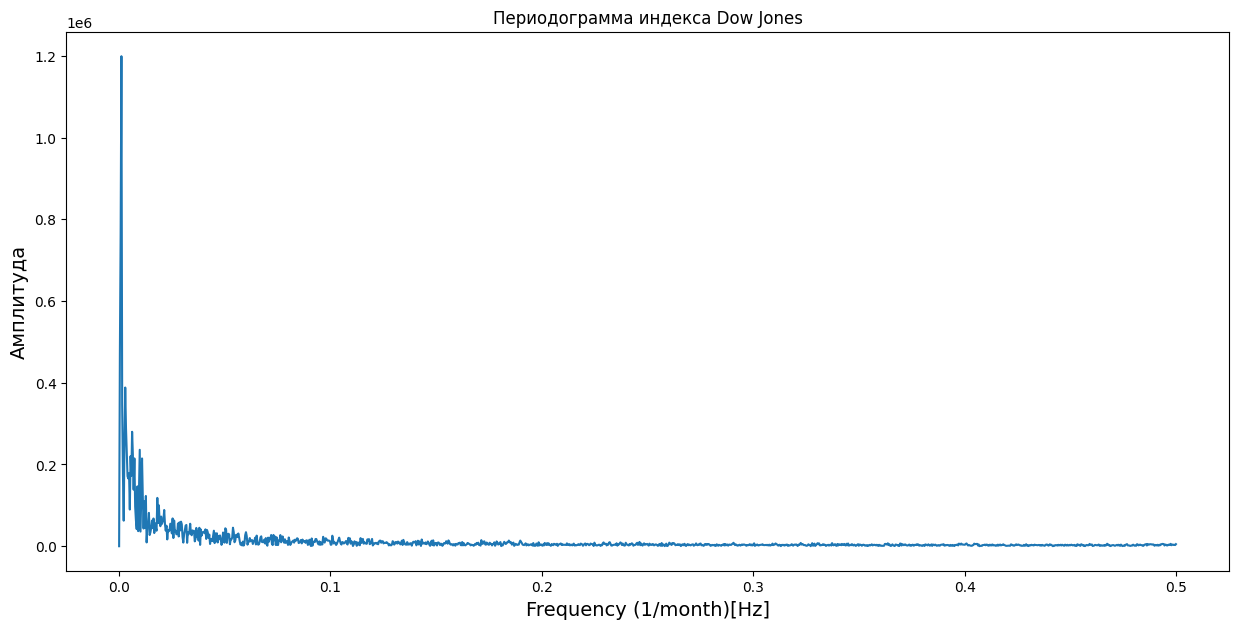

In [ ]:
y_rift_ploinomial = abs(scipy.fft.rfft(detrended_series.values))
freq = scipy.fft.rfftfreq(len(y))
plt.figure(figsize = (15, 7))
plt.plot(freq, y_rift_ploinomial)
plt.title('Периодограмма индекса Dow Jones')
plt.xlabel('Frequency (1/month)[Hz]', fontsize = 14)
plt.ylabel('Амплитуда', fontsize = 14)
plt.show()

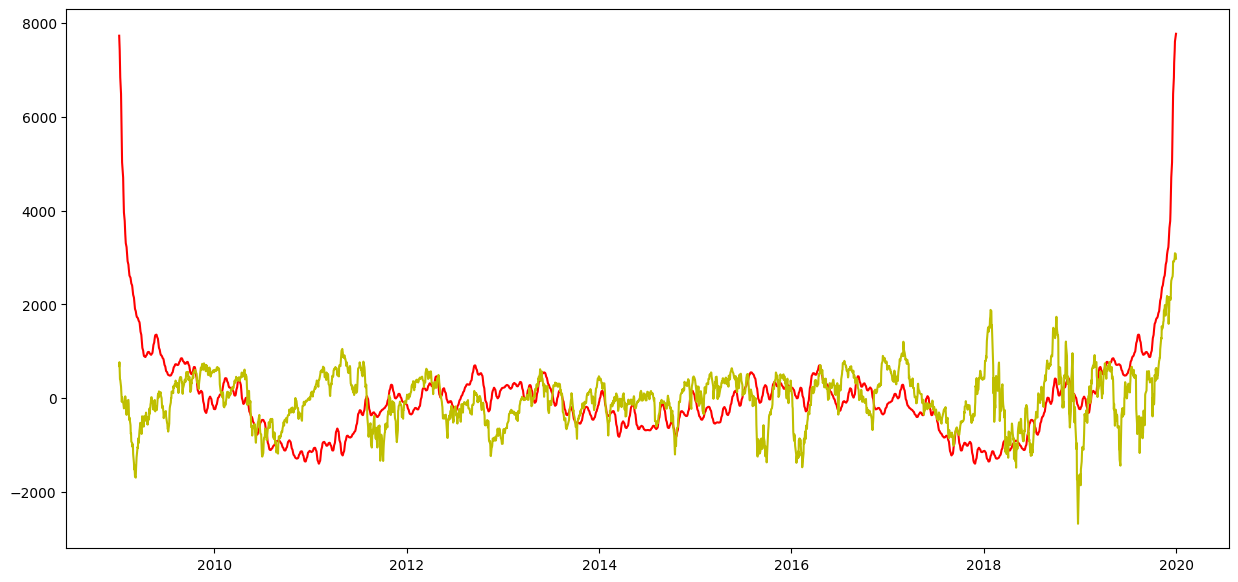

Корреляция между изначальным рядом и остатком: 0.3248482446862488


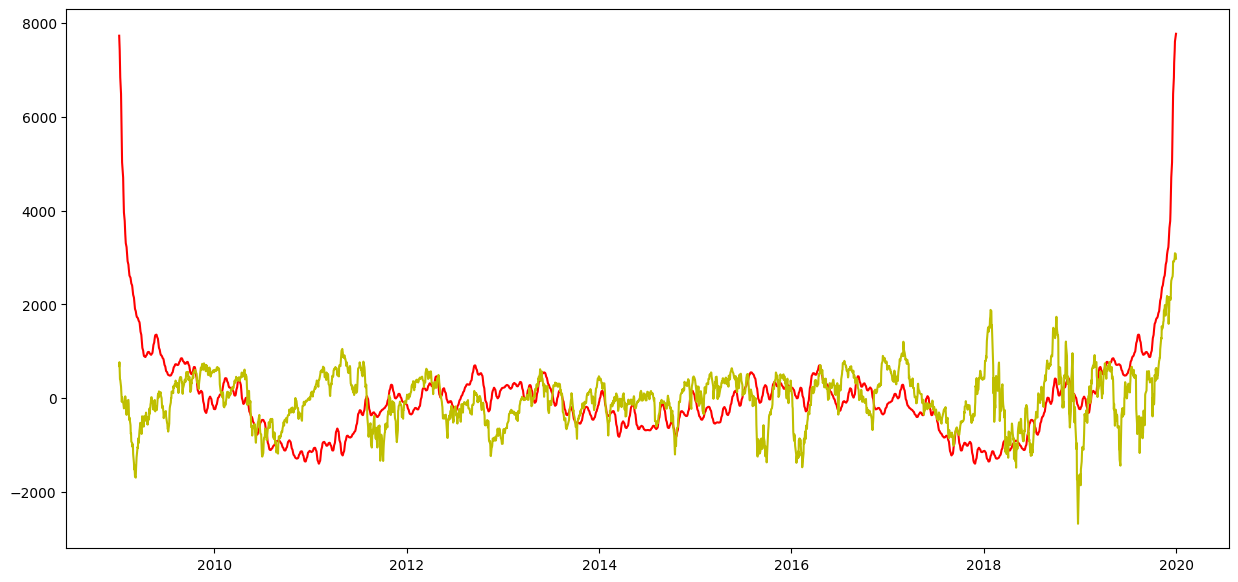

Корреляция между изначальным рядом и остатком: 0.3248482446862488


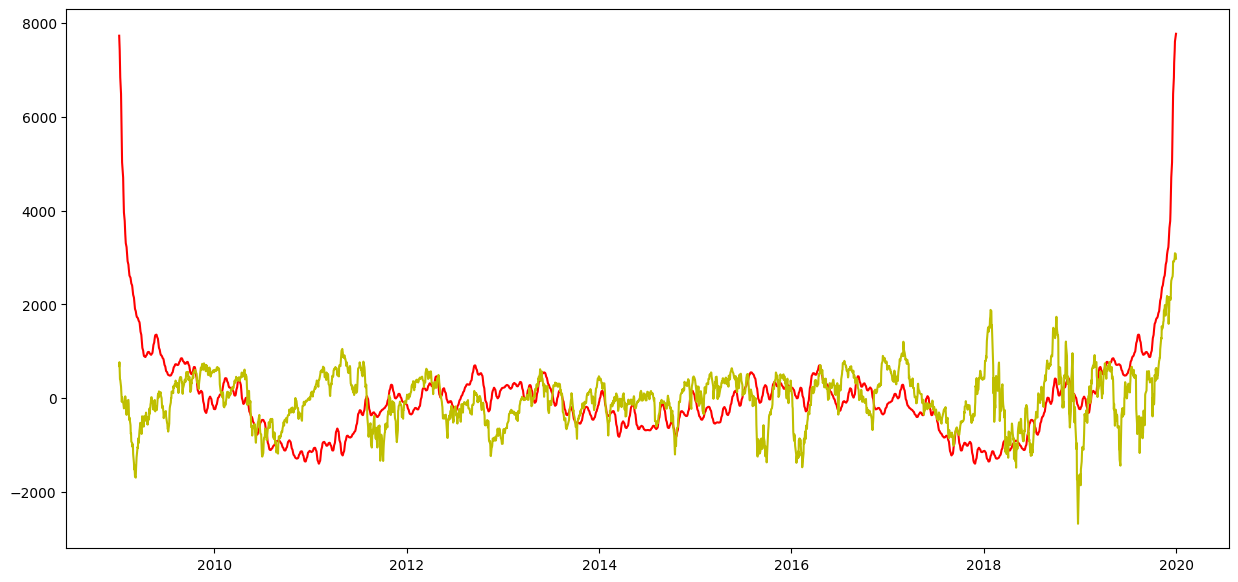

Корреляция между изначальным рядом и остатком: 0.3248482446862488


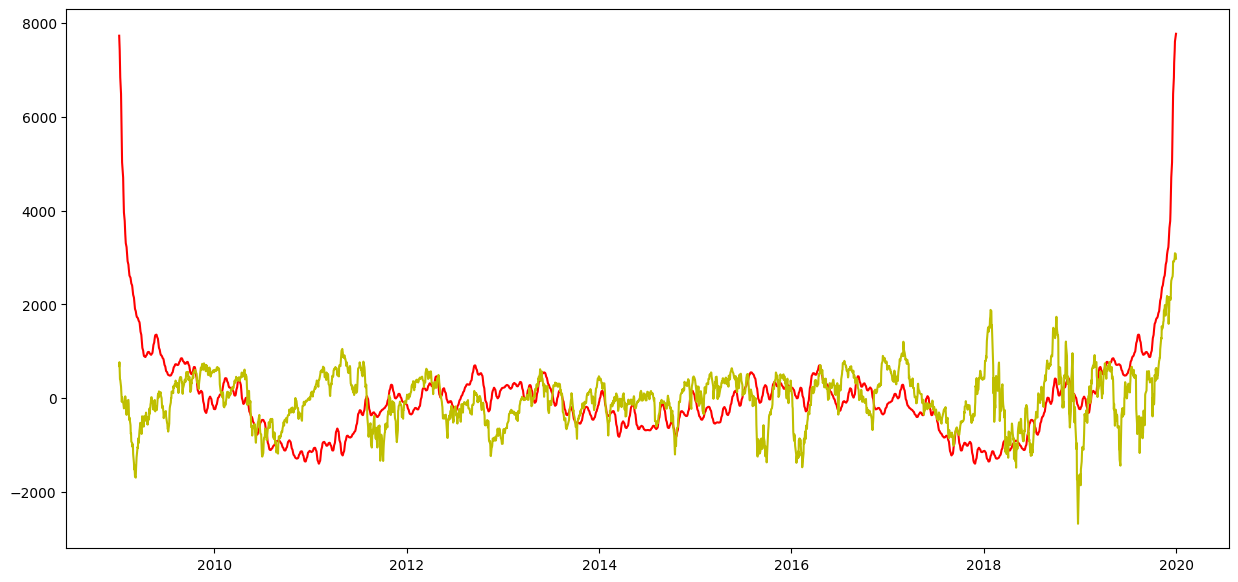

Корреляция между изначальным рядом и остатком: 0.3248482446862488


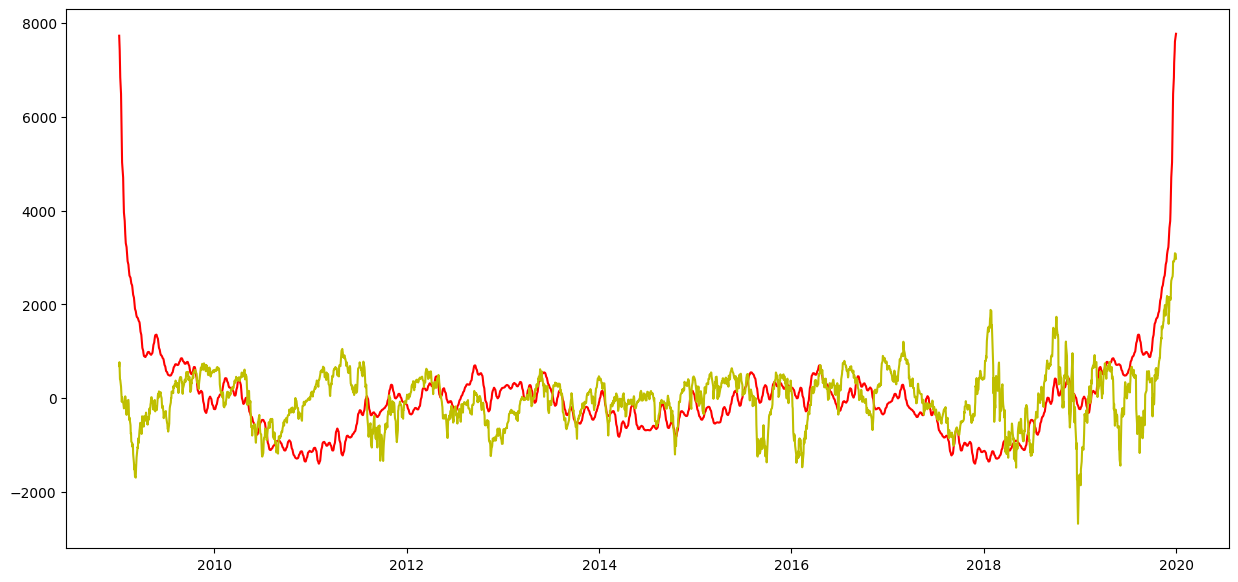

Корреляция между изначальным рядом и остатком: 0.3248482446862488


In [ ]:
threshold_lst_1 = [0.001, 0.005, 0.01, 0.05, 0.1]
for index, threshold in enumerate(threshold_lst_1):
  current_threshold_1 = threshold * max_amplitude
  filtered_y_rift_ploinomial = np.where(y_rift_ploinomial > current_threshold, y_rift_ploinomial, 0)
  filtered_y = scipy.fft.irfft(filtered_y_rift_ploinomial, n=len(y))
  plt.figure(figsize=(15, 7))
  plt.plot(df.Date, filtered_y, "r", label = "Filtered")
  plt.plot(df.Date, centered_time_series, "y", label = "Original")
  #plt.plot(residual, "b", label = "Residual")
  plt.show()
  residual = centered_time_series - filtered_y
  correlation = np.corrcoef(centered_time_series, residual)[0, 1]
  print("Корреляция между изначальным рядом и остатком:", correlation)

#Тут такая же ситуация, получается слишком большая корреляция между изначальным рядом и остатками. Попробую другой способ фильтрации, через встроенные функции scipy

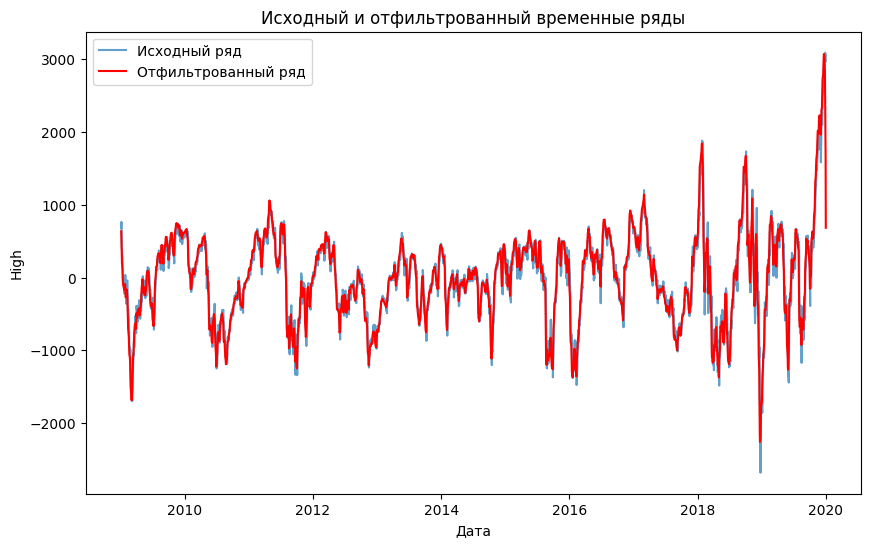

Корреляция между изначальным рядом и остатком: -0.03044515217018618


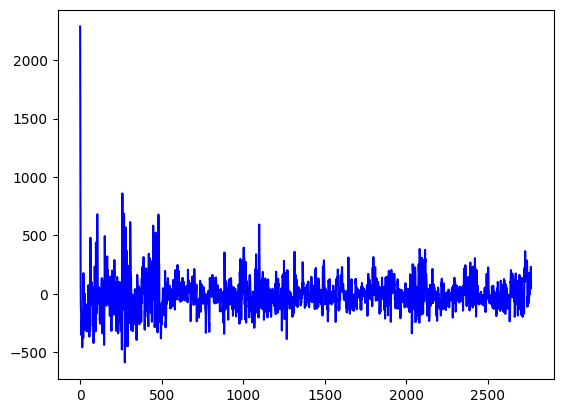

In [ ]:
b = [0.23, 0.2, 0.1]  # Коэффициенты числителя передаточной функции
a = [1.0, -0.5]  # Коэффициенты знаменателя передаточной функции

# Применение фильтрации с помощью lfilter
filtered_data = lfilter(b, a, centered_time_series)

# Визуализация исходного и отфильтрованного временных рядов
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], centered_time_series, label='Исходный ряд', alpha=0.7)
plt.plot(df["Date"], filtered_data, label='Отфильтрованный ряд', color='red')
plt.xlabel('Дата')
plt.ylabel('High')
plt.title('Исходный и отфильтрованный временные ряды')
plt.legend()
plt.show()
residual = centered_time_series - filtered_data
plt.plot(residual, "b", label = "Residual")
correlation = np.corrcoef(centered_time_series, residual)[0, 1]
print("Корреляция между изначальным рядом и остатком:", correlation)

#Перебирая коэффициенты, я добился наименьшей корреляции. Видно, что фильтр немного сгладил временной ряд. Если покопаться больше, можно было бы получить что то более дельное

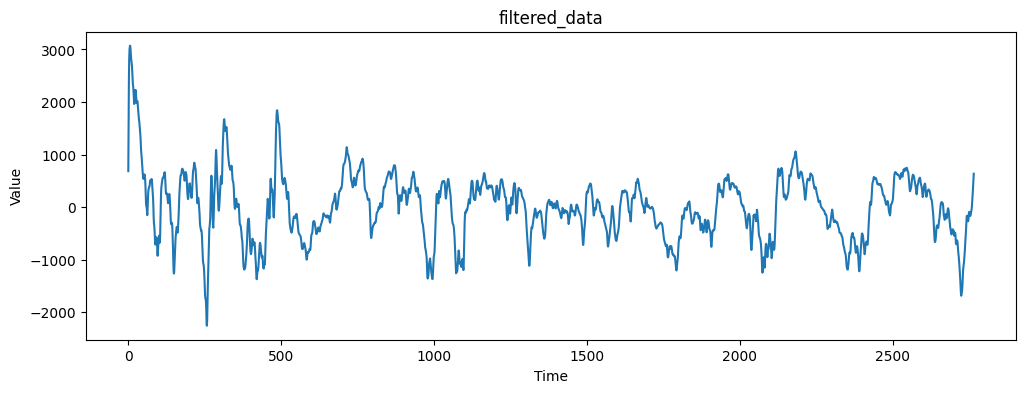

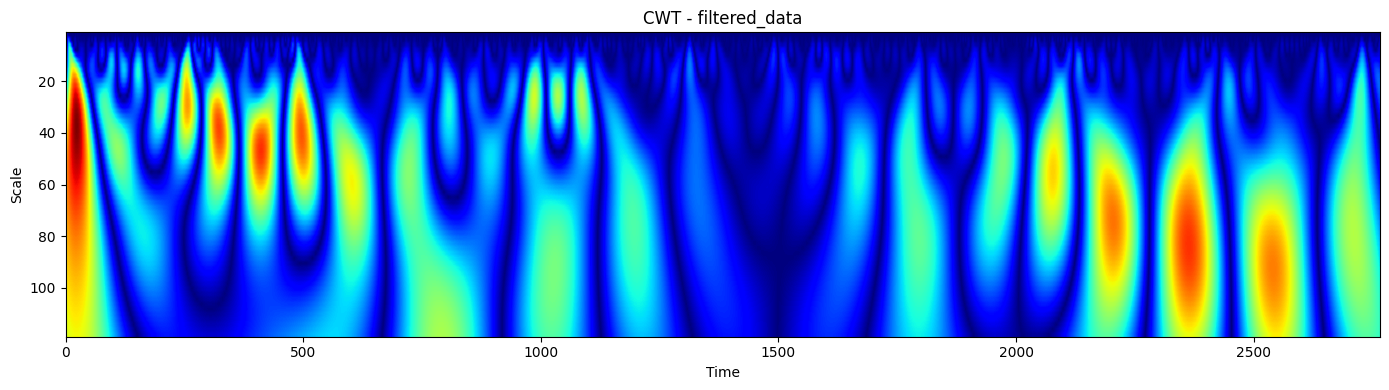

In [ ]:
wavelet = signal.ricker
scales = np.arange(1, 120, 2)
plt.figure(figsize=(12, 4))
plt.plot(filtered_data)
plt.title("filtered_data")
plt.xlabel("Time")
plt.ylabel("Value")
# Вейвлет-преобразование
cwt_centered = signal.cwt(filtered_data, wavelet, scales)

# Визуализация скалограммы
plt.figure(figsize=(14, 4))
plt.imshow(np.abs(cwt_centered), extent=[0, len(filtered_data), scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title("CWT - filtered_data")
plt.xlabel("Time")
plt.ylabel("Scale")

plt.tight_layout()
plt.show()

#Можно увидеть, что вейвлеты получились идентичными, как со случаем фильтрации с помощью порога на периодограмме, так и с помощью встроенной функции.


/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


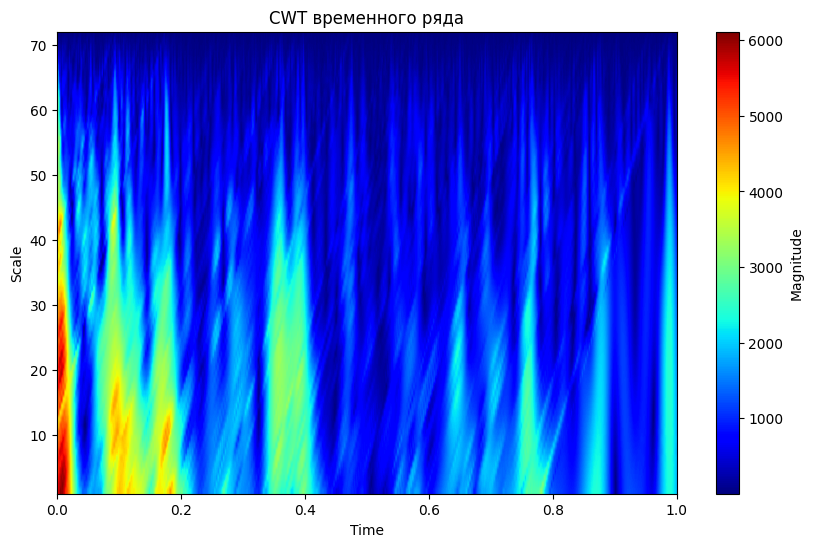

In [ ]:
coefficients, frequencies = pywt.cwt(filtered_data, np.arange(1,72), wavelet='cmor')
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0, 1, 1, 72])
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("CWT временного ряда")
plt.show()

In [ ]:
scg.set_default_wavelet('cmor1-1.5')

-


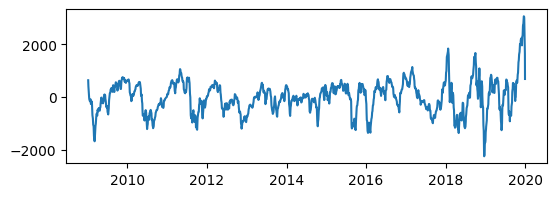

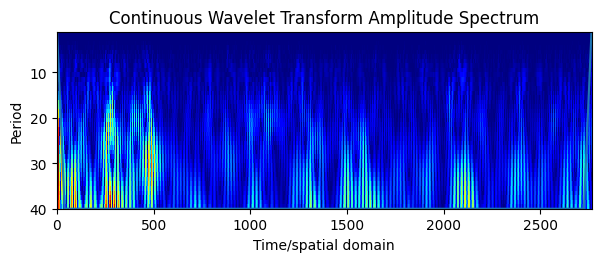

In [ ]:
ns   = 970
time = np.arange(ns)

scales = scg.periods2scales( np.arange(1, 40) )

fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));
lines = ax1.plot(df.Date, filtered_data);
try:
  ax2 = scg.cws(filtered_data, scales=scales, figsize=(6.9,2.3));
  txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
  plt.tight_layout()

except TypeError as e:
  if "alpha must be numeric or None, not a string" in str(e):
    print("-")

In [ ]:
wavelet_list = pywt.wavelist()
print(wavelet_list)

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

-


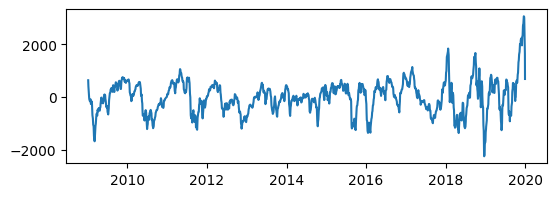

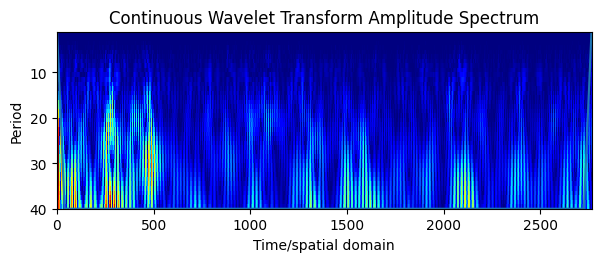

In [ ]:
scg.set_default_wavelet('morl')
ns   = 970
time = np.arange(ns)
scales = scg.periods2scales( np.arange(1, 40) )

fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));
lines = ax1.plot(df.Date, filtered_data);

try:
  ax2 = scg.cws(filtered_data, scales=scales,  figsize=(6.9,2.3));
  txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
  plt.tight_layout()

except TypeError as e:
  if "alpha must be numeric or None, not a string" in str(e):
    print("-")

-


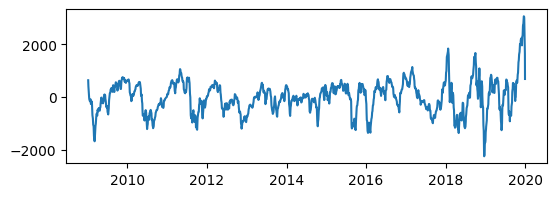

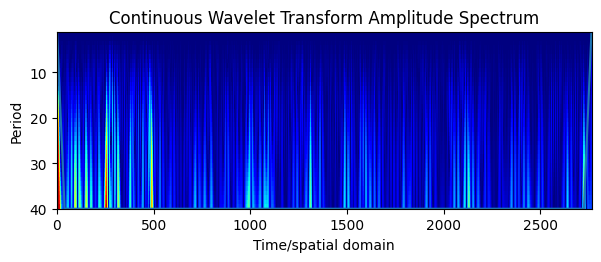

In [ ]:
scg.set_default_wavelet('mexh')
ns   = 970
time = np.arange(ns)
scales = scg.periods2scales( np.arange(1, 40) )

fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));
lines = ax1.plot(df.Date, filtered_data);

try:
  ax2 = scg.cws(filtered_data, scales=scales, figsize=(6.9,2.3));
  txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
  plt.tight_layout()

except TypeError as e:
  if "alpha must be numeric or None, not a string" in str(e):
    print("-")

#В целом, все вейвлет спектры показывают всплески вначале и единичные всплески потом.

In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>Интересные вейвлеты!</b></marquee>

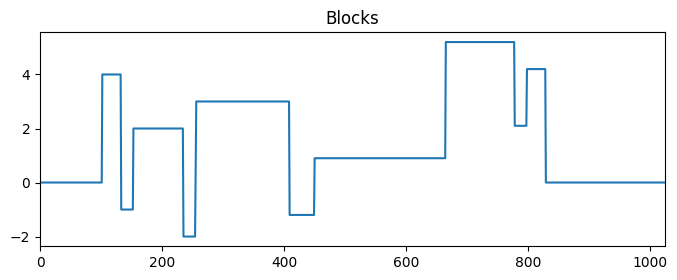

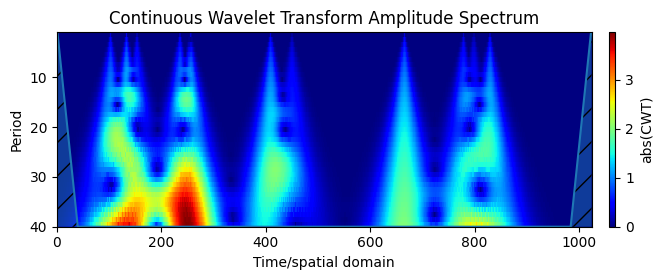

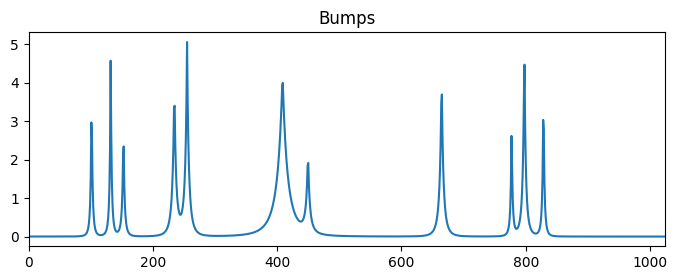

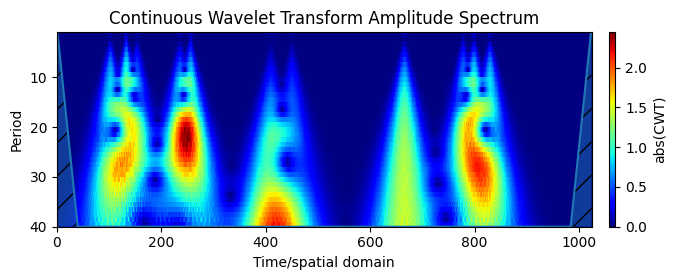

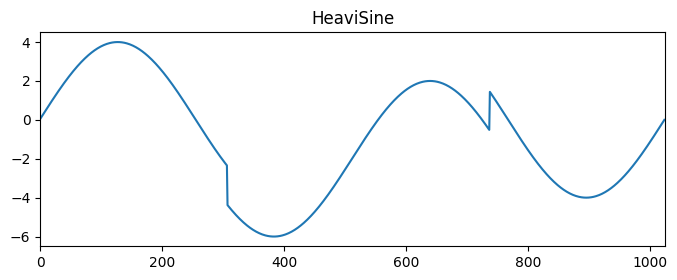

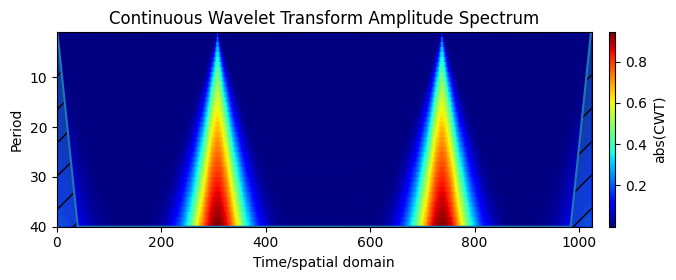

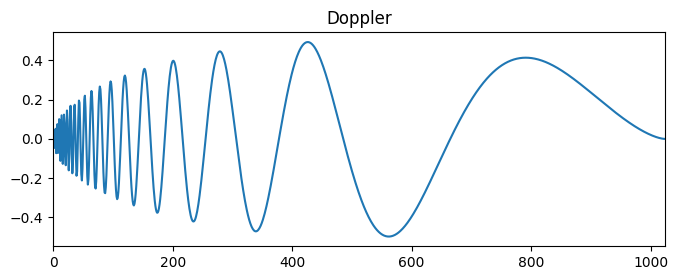

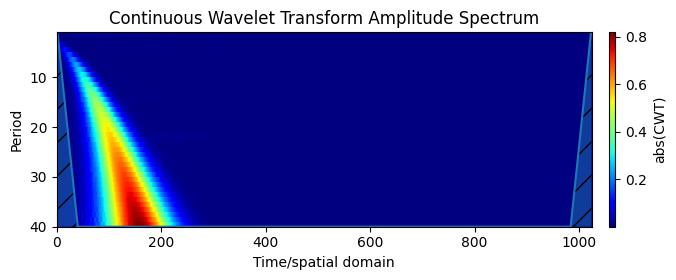

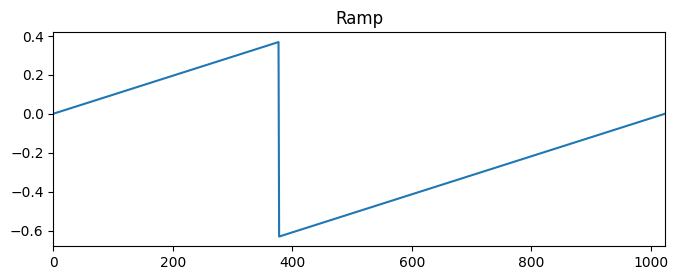

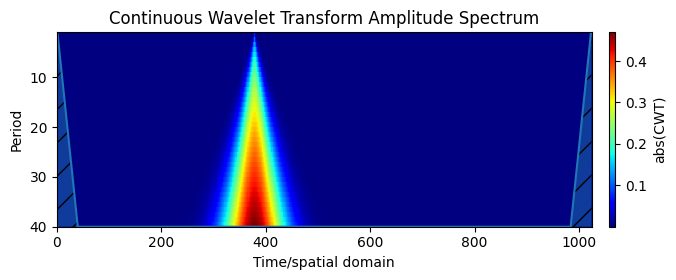

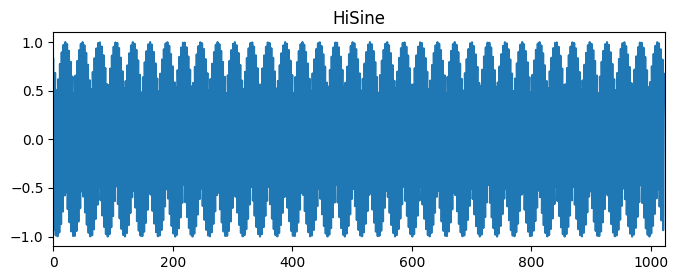

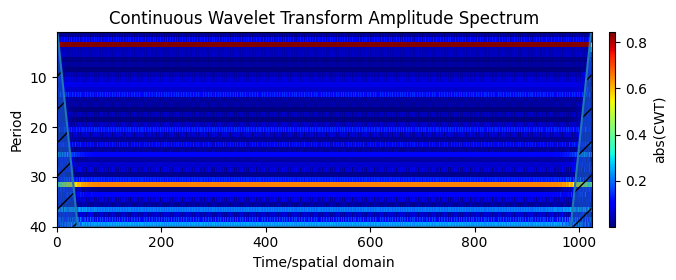

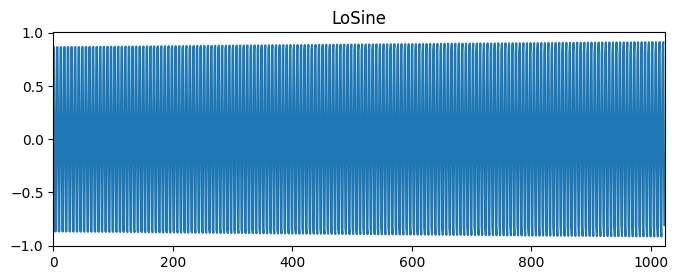

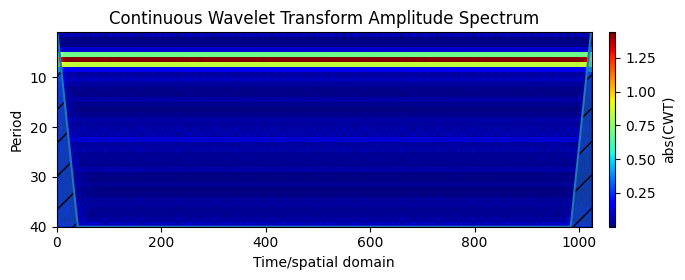

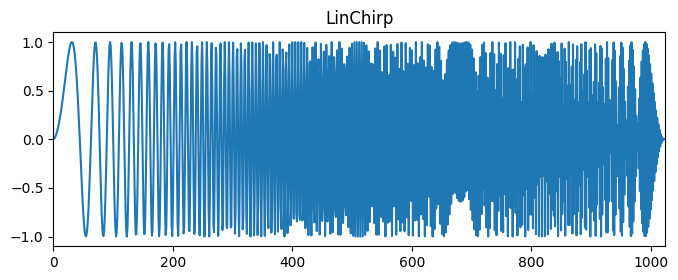

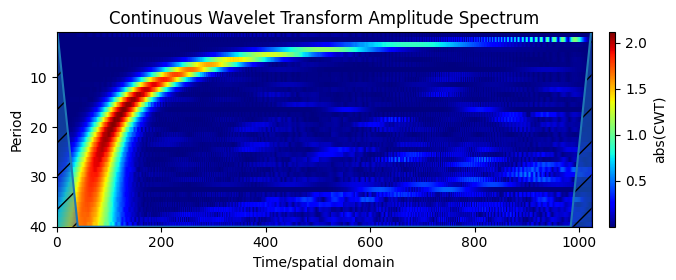

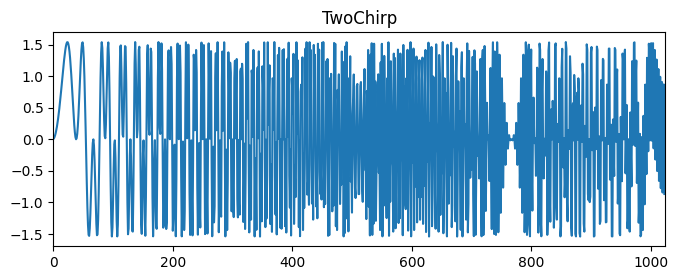

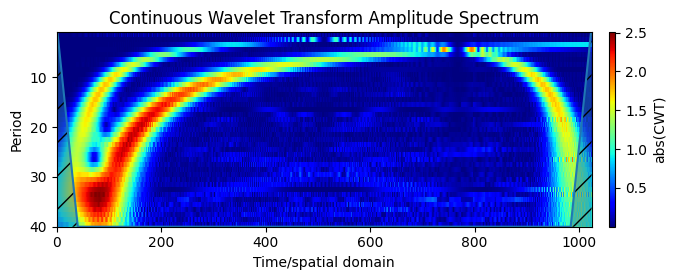

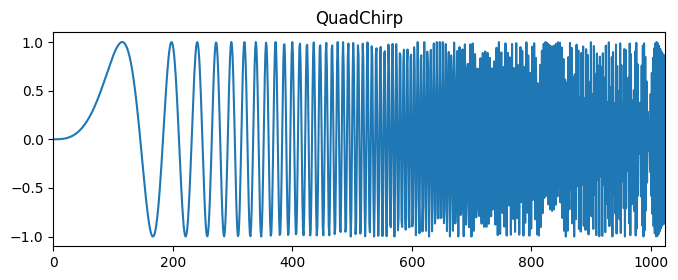

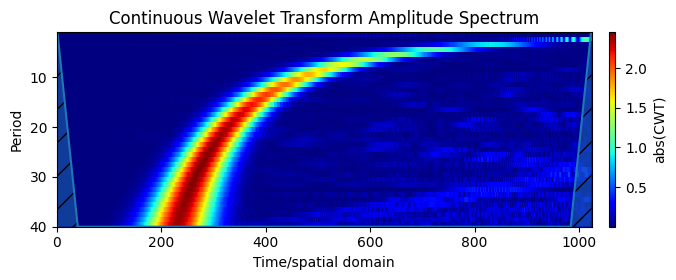

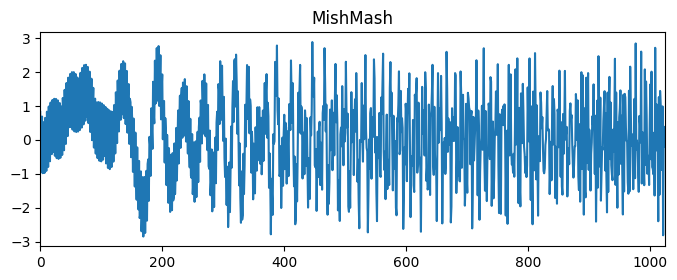

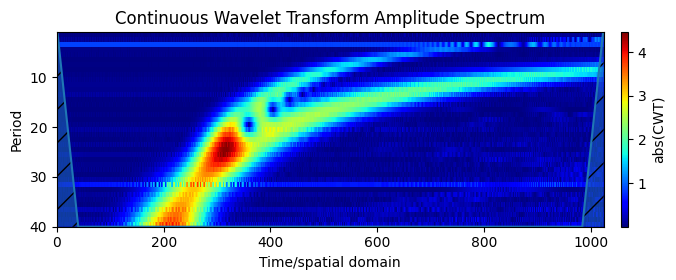

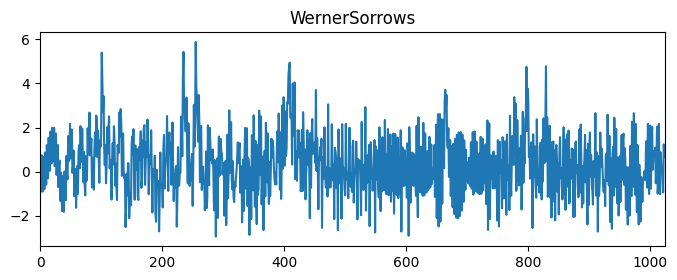

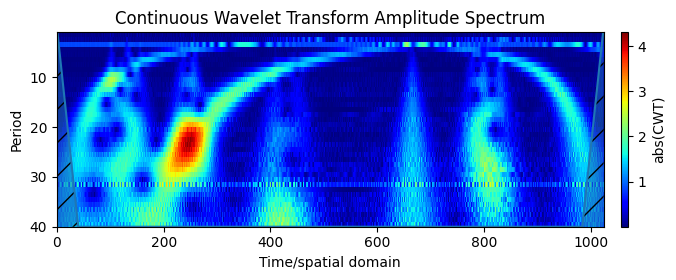

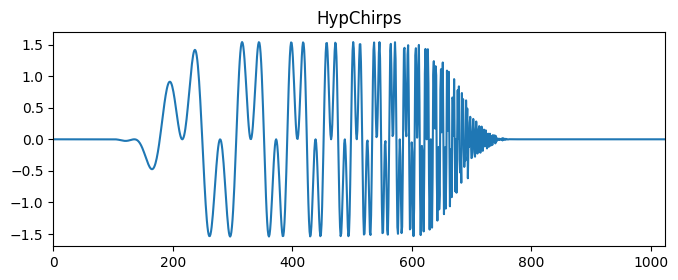

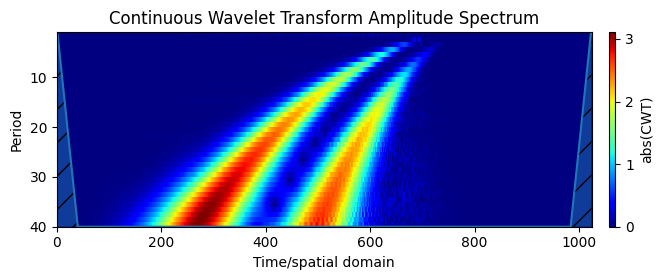

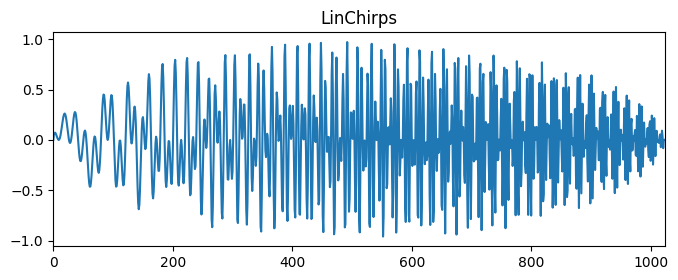

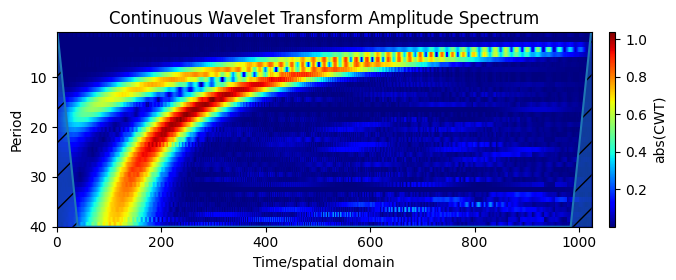

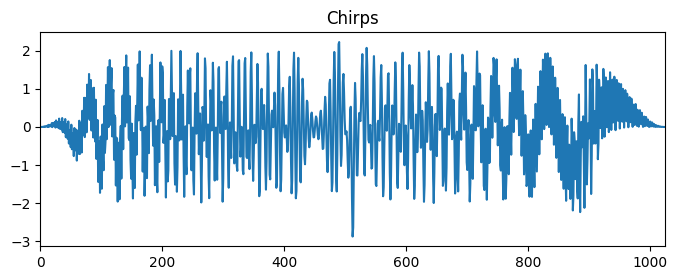

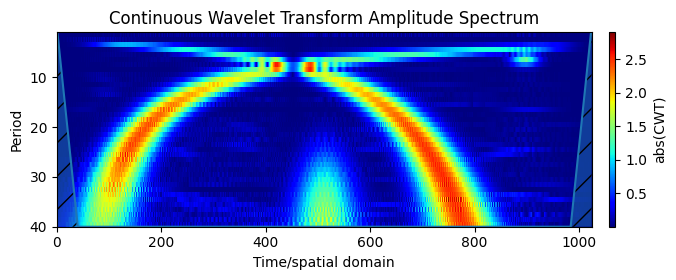

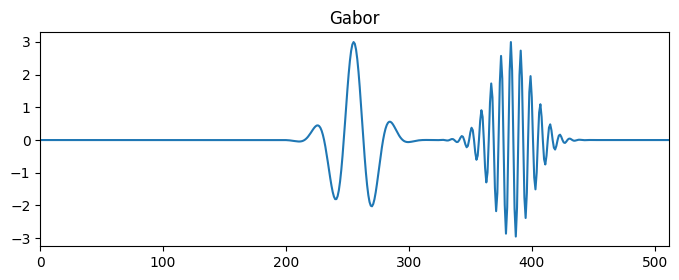

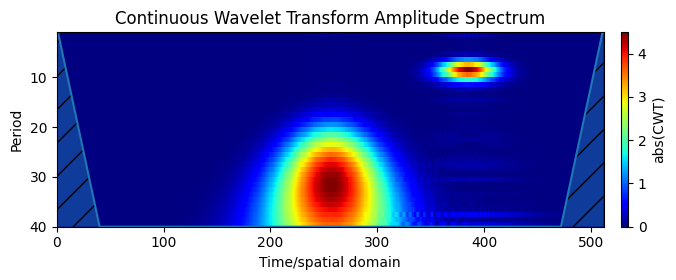

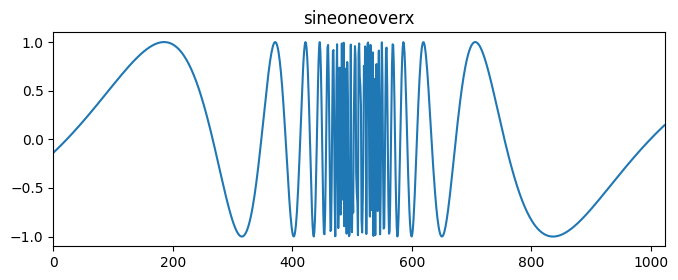

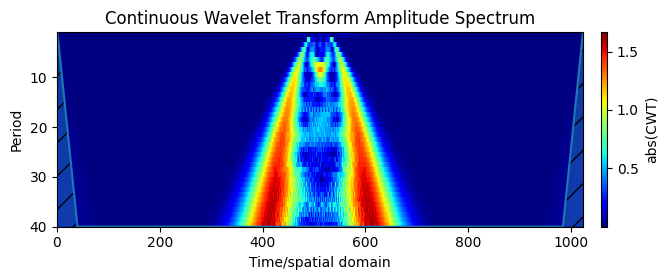

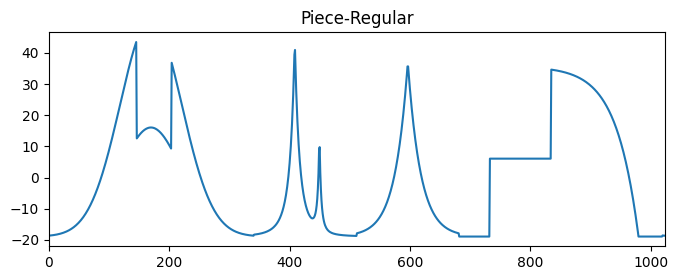

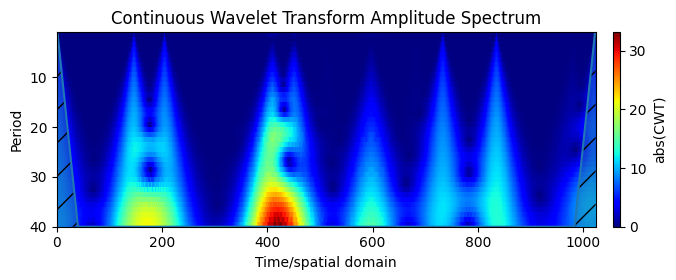

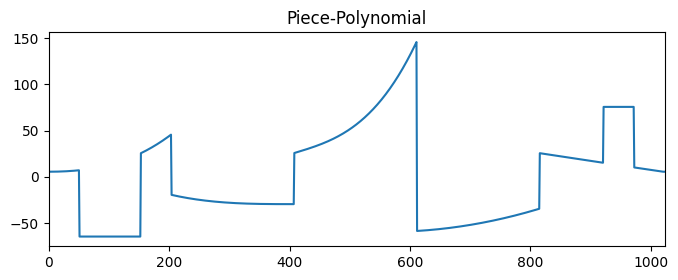

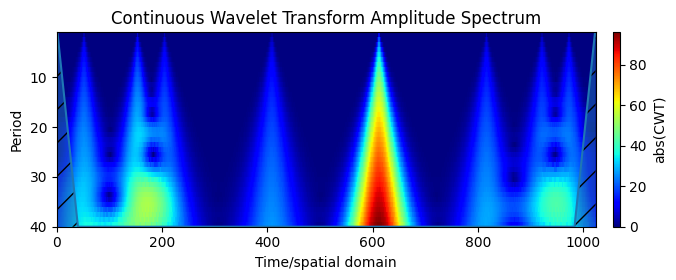

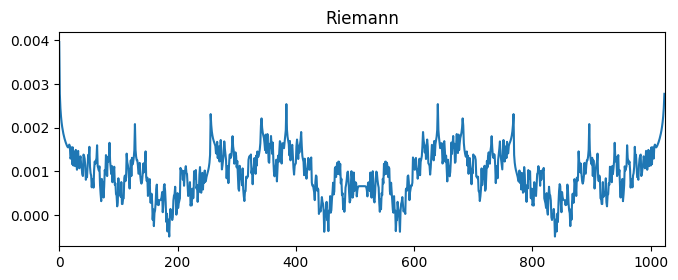

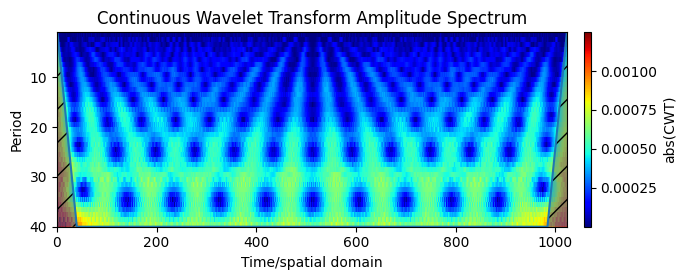

In [ ]:
signals = pywt.data.demo_signal('list')
signal_length=1024
for signal in signals:
    if signal in ['Gabor', 'sineoneoverx']:
        x = pywt.data.demo_signal(signal)
    else:
        x = pywt.data.demo_signal(signal, signal_length)
    times=[]
    signals=[]
    for time, sig in enumerate(x.real):
        times.append(time)
        signals.append(sig)
    scg.set_default_wavelet('cmor1-1.5')
    scales = scg.periods2scales( arange(1, 40) )
    fig1, ax1 = subplots(1, 1, figsize=(6.9,2.9));
    lines = ax1.plot(signals);
    ax1.set_xlim(0, len(times))
    ax1.set_title("%s"%signal)
    fig1.tight_layout()
    ax2 = scg.cws(signals, scales=scales, figsize=(6.9,2.9), coikw=coikw);
    tight_layout()
    show()